# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [263]:
!pip install --upgrade numpy pandas

%pip install seaborn

  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is inco

In [264]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn import tree

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, precision_recall_curve

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [265]:
# Import data from Azure Blob Storage container via Datastore URI
df = pd.read_csv("/content/hmeq.csv")
# View the first 5 rows
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [266]:
# View the last 5 rows
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [267]:
# Check the shape, or number of rows and columns, of the data
df.shape

(5960, 13)

- The dataset has 5,960 rows and 13 columns.

In [268]:
# Check for duplicates
df.duplicated().sum()

0

- There are no duplicate records

In [269]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [270]:
# Rename the columns to more meaningful and descriptive names using Pythonic naming convention, i.e. snake_case
df = df.rename(columns={'BAD': 'defaulted', 'LOAN': 'loan_amount', 'MORTDUE': 'mortgage_due', 'VALUE': 'property_value', 'REASON': 'loan_reason', 'JOB': 'job_type', 'YOJ': 'years_at_job', 'DEROG': 'derogatory_reports',
       'DELINQ': 'delinquent_credit_lines', 'CLAGE': 'oldest_credit_line_age_months', 'NINQ': 'recent_credit_inquiries', 'CLNO': 'existing_credit_lines', 'DEBTINC': 'debt_to_income_ratio'})

# Verify column name changes
df.columns

Index(['defaulted', 'loan_amount', 'mortgage_due', 'property_value',
       'loan_reason', 'job_type', 'years_at_job', 'derogatory_reports',
       'delinquent_credit_lines', 'oldest_credit_line_age_months',
       'recent_credit_inquiries', 'existing_credit_lines',
       'debt_to_income_ratio'],
      dtype='object')

In [271]:
df['defaulted'].value_counts(normalize=True)

,proportion
defaulted,
0,0.800503
1,0.199497


In [272]:
# Check the data's information such as columns, null values, and column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   defaulted                      5960 non-null   int64  
 1   loan_amount                    5960 non-null   int64  
 2   mortgage_due                   5442 non-null   float64
 3   property_value                 5848 non-null   float64
 4   loan_reason                    5708 non-null   object 
 5   job_type                       5681 non-null   object 
 6   years_at_job                   5445 non-null   float64
 7   derogatory_reports             5252 non-null   float64
 8   delinquent_credit_lines        5380 non-null   float64
 9   oldest_credit_line_age_months  5652 non-null   float64
 10  recent_credit_inquiries        5450 non-null   float64
 11  existing_credit_lines          5738 non-null   float64
 12  debt_to_income_ratio           4693 non-null   f

- We see that there are 11 columns with null values: all except for the 'defaulted' and 'loan_amount' columns

- Seems like columns 'derogatory_reports', 'delinquent_credit_lines', 'oldest_credit_line_age_months', 'recent_credit_inquiries', 'existing_credit_lines' can be of data type 'int' instead of 'float' as those features can only be whole numbers

- Should check why the mortgage amount and property value, in which cents are negligible, are in float type

In [273]:
# Check number of unique values for each column
df.nunique()

,0
defaulted,2
loan_amount,540
mortgage_due,5053
property_value,5381
loan_reason,2
job_type,6
years_at_job,99
derogatory_reports,11
delinquent_credit_lines,14
oldest_credit_line_age_months,5314


In [274]:
# Rename DebtCon to Debt Consolidation
df.loc[df['loan_reason'] == 'DebtCon', 'loan_reason'] = 'Debt Consolidation'

# Rename HomeImp to Home Improvement
df.loc[df['loan_reason'] == 'HomeImp', 'loan_reason'] = 'Home Improvement'

In [275]:
# Rename ProfExe to executive
df.loc[df['job_type'] == 'ProfExe', 'job_type'] = 'Executive'

# Rename Mgr to Manager
df.loc[df['job_type'] == 'Mgr', 'job_type'] = 'Manager'

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

In [276]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
defaulted,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
loan_amount,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
mortgage_due,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
property_value,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
years_at_job,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
derogatory_reports,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
delinquent_credit_lines,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
oldest_credit_line_age_months,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
recent_credit_inquiries,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
existing_credit_lines,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


- Observations from Summary Statistics

**1. Loan Amount:**

Range: The loan amounts range from \$1,100 to \$89,900, showing a wide variety of loan sizes.

Mean: The average loan amount is \$18,608, with a standard deviation of \$11,207, indicating that the loan sizes vary significantly.

Median: The median (50th percentile) loan amount is \$16,300, slightly lower than the mean, which suggests a right-skewed distribution (a few large loans are pulling the mean upwards).

**2. Mortgage Due:**

Missing Data: There are only 5,442 non-null values, indicating missing data for 518 loans.

Range: The amount due on existing mortgages ranges from \$2,063 to \$399,550.

Mean: The average mortgage due is \$73,760, with a high standard deviation of \$44,457, suggesting significant variability in mortgage amounts.

Median: The median is \$65,019, meaning half of the applicants have mortgages below this value.

**3. Property Value:**

Missing Data: 5,848 non-null values, so 112 missing values.

Range: Property values range from \$8,000 to \$855,909, indicating a diverse range of properties.

Mean: The average property value is \$101,776, but the large standard deviation of \$57,386 points to high variability.

Median: The median property value is \$89,236, which is less than the mean, again suggesting a right-skewed distribution.

**4. Years at Job:**

Missing Data: 5,445 non-null values, meaning 515 missing.

Range: Years at the present job range from 0 to 41 years.

Mean: The average is 8.9 years, with a median of 7 years, indicating that most applicants have relatively stable job histories.

Distribution: The 25th percentile is 3 years, while the 75th percentile is 13 years, showing that job stability varies widely among applicants.

**5. Derogatory Reports:**

Missing Data: 5,252 non-null values, meaning 708 missing.

Mean: The average number of major derogatory reports is 0.25, with a median of 0, meaning most applicants have no major derogatory reports.

Outliers: Some applicants have up to 10 derogatory reports, indicating a small number of applicants with significant financial issues.

**6. Delinquent Credit Lines:**

Missing Data: 5,380 non-null values, meaning 580 missing.

Mean: The average number of delinquent credit lines is 0.45, with a median of 0, indicating that most applicants do not have delinquent credit lines.

Outliers: Some applicants have up to 15 delinquent credit lines, suggesting serious financial distress for a few.

**7. Oldest Credit Line Age (Months):**

Missing Data: 5,652 non-null values, meaning 308 missing.

Mean: The average age of the oldest credit line is about 179.77 months (about 15 years).

Range: The oldest credit lines go up to 1,168 months (97 years), which seems like an outlier or potential data issue.

Distribution: The 25th percentile is 115 months (about 9.6 years), and the 75th percentile is 231 months (about 19.3 years), meaning there is wide variability in the length of credit history.

**8. Recent Credit Inquiries:**

Missing Data: 5,450 non-null values, meaning 510 missing.

Mean: The average number of recent credit inquiries is 1.19, with a median of 1.

Distribution: The 25th percentile is 0 and the 75th percentile is 2, indicating that most applicants have few recent credit inquiries.

**9. Existing Credit Lines:**

Missing Data: 5,738 non-null values, meaning 222 missing.

Mean: The average number of existing credit lines is 21.3, with a median of 20, suggesting that applicants generally have a moderate number of credit lines.

Range: Some applicants have up to 71 credit lines, which may indicate credit management challenges for certain individuals.

**10. Debt-to-Income Ratio:**

Missing Data: 4,693 non-null values, meaning 1,267 missing.

Mean: The average debt-to-income ratio is 33.78%, with a standard deviation of 8.60%.

Distribution: The median is 34.82%, and the 75th percentile is 39.00%, suggesting that most applicants have debt-to-income ratios below 40%, which is generally acceptable for lenders.

Outliers: The maximum debt-to-income ratio is 203.31%, which is an extreme outlier and indicates severe over-indebtedness for a few applicants.

**Key Insights:**

Loan defaults are relatively rare (20%), but the data shows a skew where a small percentage of applicants have significant financial difficulties (e.g., many derogatory reports, delinquent lines, or high debt-to-income ratios).

Loan amounts and mortgage amounts vary significantly, with higher values likely tied to more valuable properties.

Years at job and credit line age show that many applicants have long-term financial histories and stable employment, though some have much shorter histories.

Derogatory reports and delinquent credit lines are uncommon, but a few applicants face serious financial challenges.

Debt-to-income ratio is typically manageable for most applicants, though some are at extreme risk due to high debt burdens.

### **Univariate Analysis**


In [277]:
numeric_columns = ['loan_amount', 'mortgage_due', 'property_value', 'years_at_job', 'derogatory_reports', 'delinquent_credit_lines', 'oldest_credit_line_age_months', 'recent_credit_inquiries', 'existing_credit_lines', 'debt_to_income_ratio']

#### **Numerical**

In [278]:
# Function to create 2 subplots: boxplot and histogram
def boxplot_histogram(df, feature, figsize = (8, 6)):

    univari_fig, (box, histo) = plt.subplots(nrows=2, sharex=True, figsize=figsize) # create subplots

    sns.boxplot(data=df, x=feature, ax=box) # create boxplot

    sns.histplot(data=df, x=feature, ax=histo) # create histogram

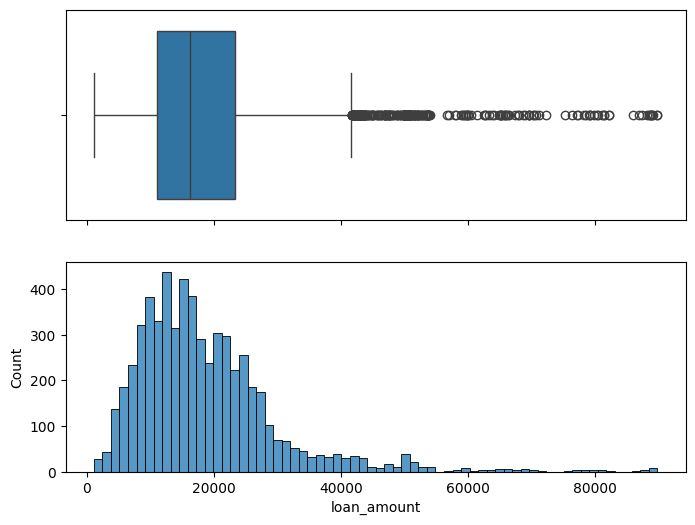

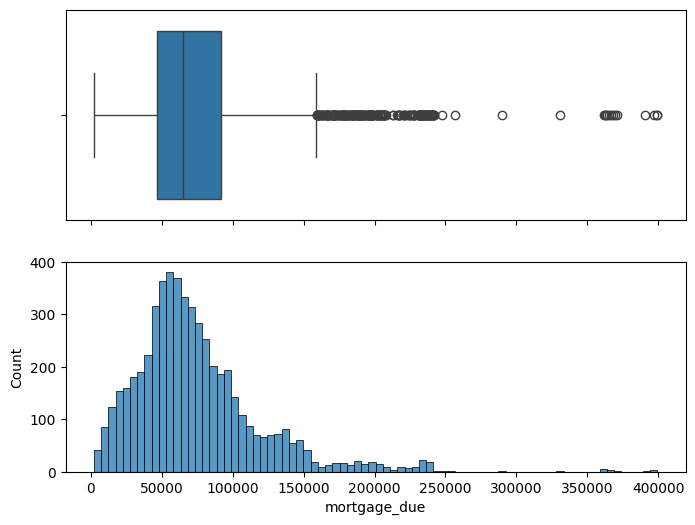

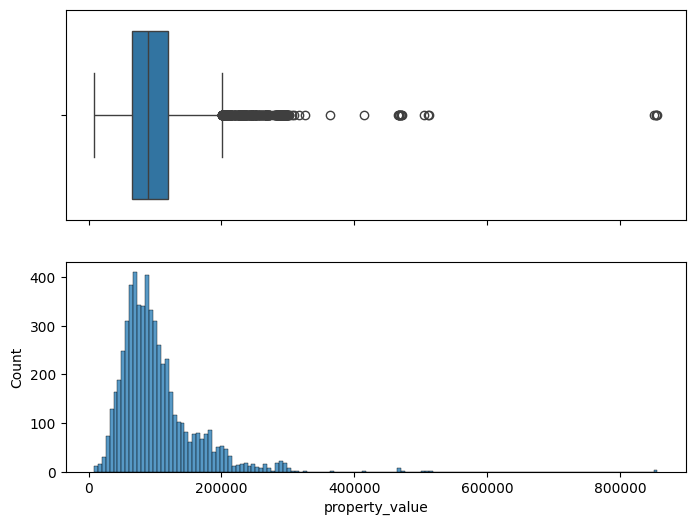

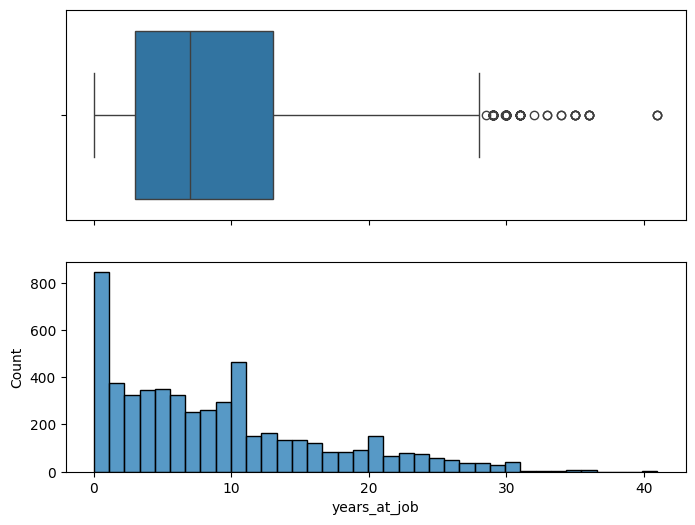

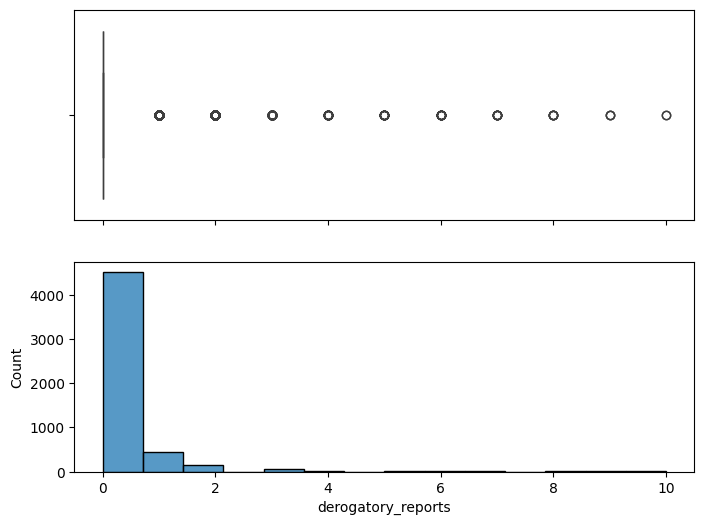

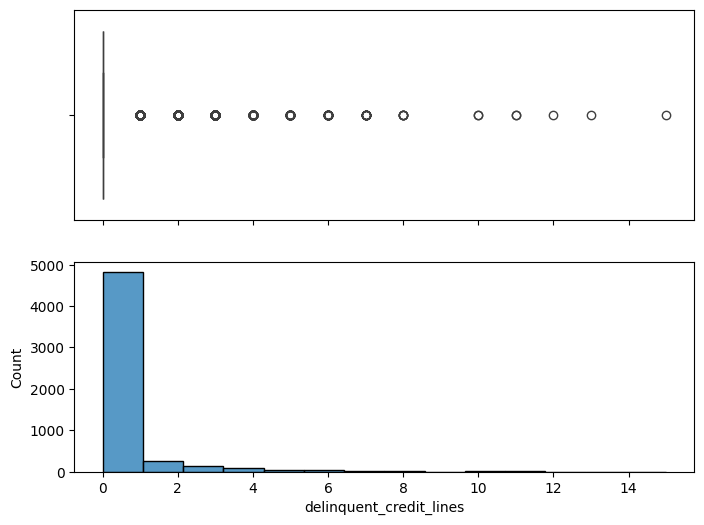

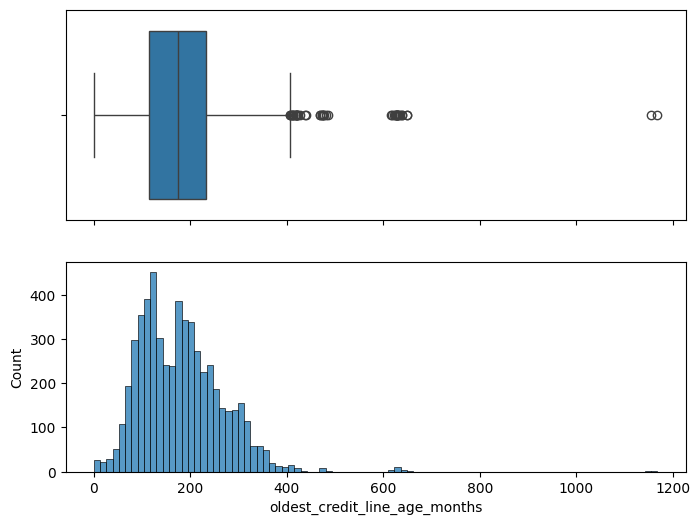

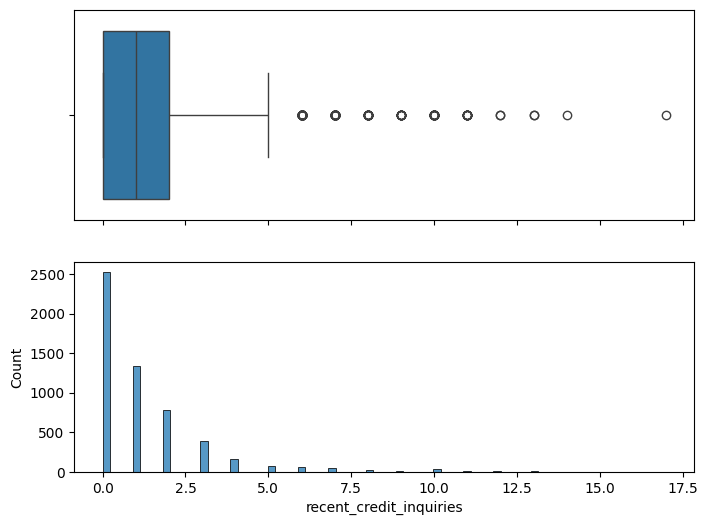

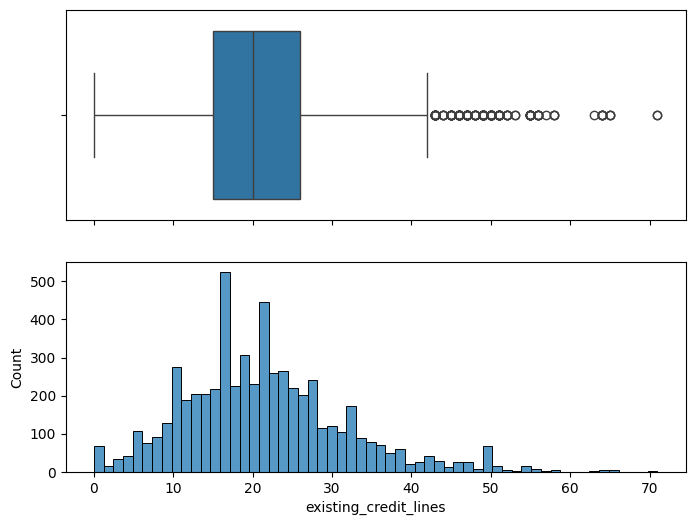

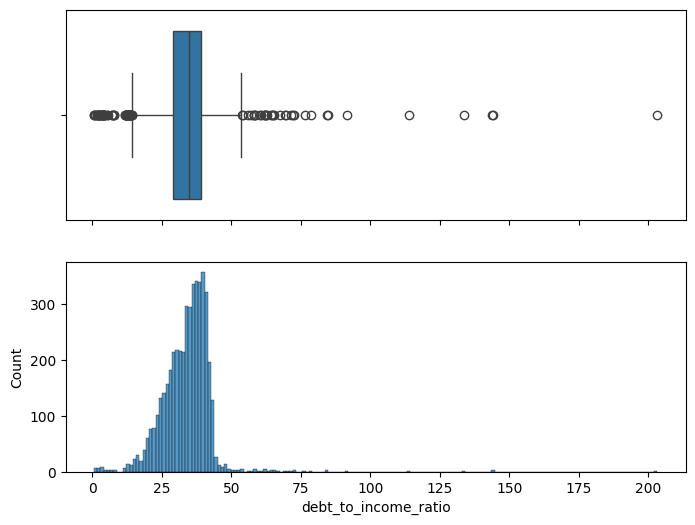

In [279]:
for column in numeric_columns:
    boxplot_histogram(df, column)

- The loan amounts are skewed to the right and range from \$1,100 to \$89,900

- The mortgage due is also skewed to the right with the outliers starting around \$150,000

- The property values are also skewed to the right with the outliers greater than \$200,000

- The years at job are also skewed to the right wit the outliers starting around 28 years.

- The overwhelming amount of customers have no derogatory reports with the distribution skewed to the right.

- The same can be said of delinquent credit lines as can be said for derogatory reports.

- Oldest credit line age in months is bimodal at around 125 months and 175 months with it skewed to the right with outliers around 400 months.

- About half or so of the customers have no recent credit inquiries and skewed to the right at around 5 inquiries.

- Existing credit lines is multi-modal at 7, 12, 17, 23, 27, 34, and 50 with outliers past 50 credit lines.

- Debt to income ratio has outliers to the left and right with greater skew to the right. The mode is around 40.

#### **Categorical**

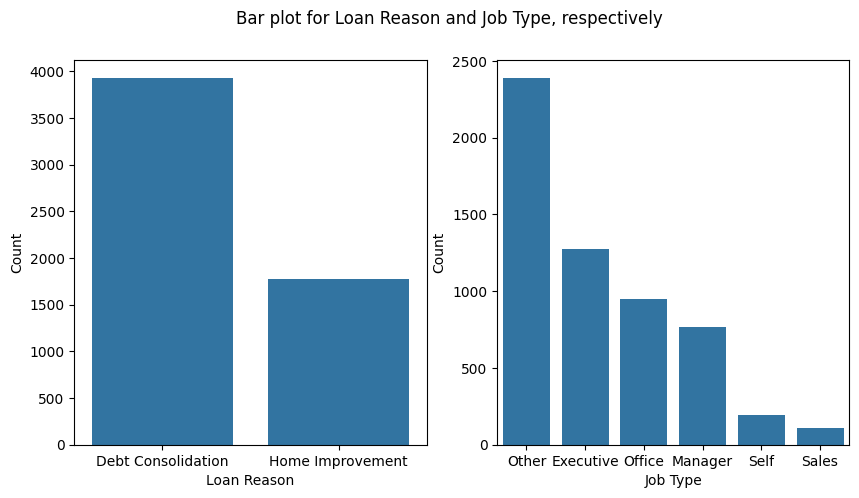

In [280]:
# Bar charts for categorical variable distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Bar plot for Loan Reason and Job Type, respectively')

sns.countplot(ax=axes[0], x='loan_reason', data=df, order=df['loan_reason'].value_counts().index)
axes[0].set_xlabel('Loan Reason')
axes[0].set_ylabel('Count')

sns.countplot(ax=axes[1], x='job_type', data=df, order=df['job_type'].value_counts().index)
axes[1].set_xlabel('Job Type')
axes[1].set_ylabel('Count');

- Well over twice as many customers took out a loan to consolidate their debt than those that took out loans for home improvement.

- The majority of the job types are listed as 'Other' with those that are self-employed and in sales on the lower end.

### **Bivariate Analysis**

#### **Numerical Numerical Analysis**

In [281]:
numeric_df = df.drop(['loan_reason', 'job_type'], axis=1)

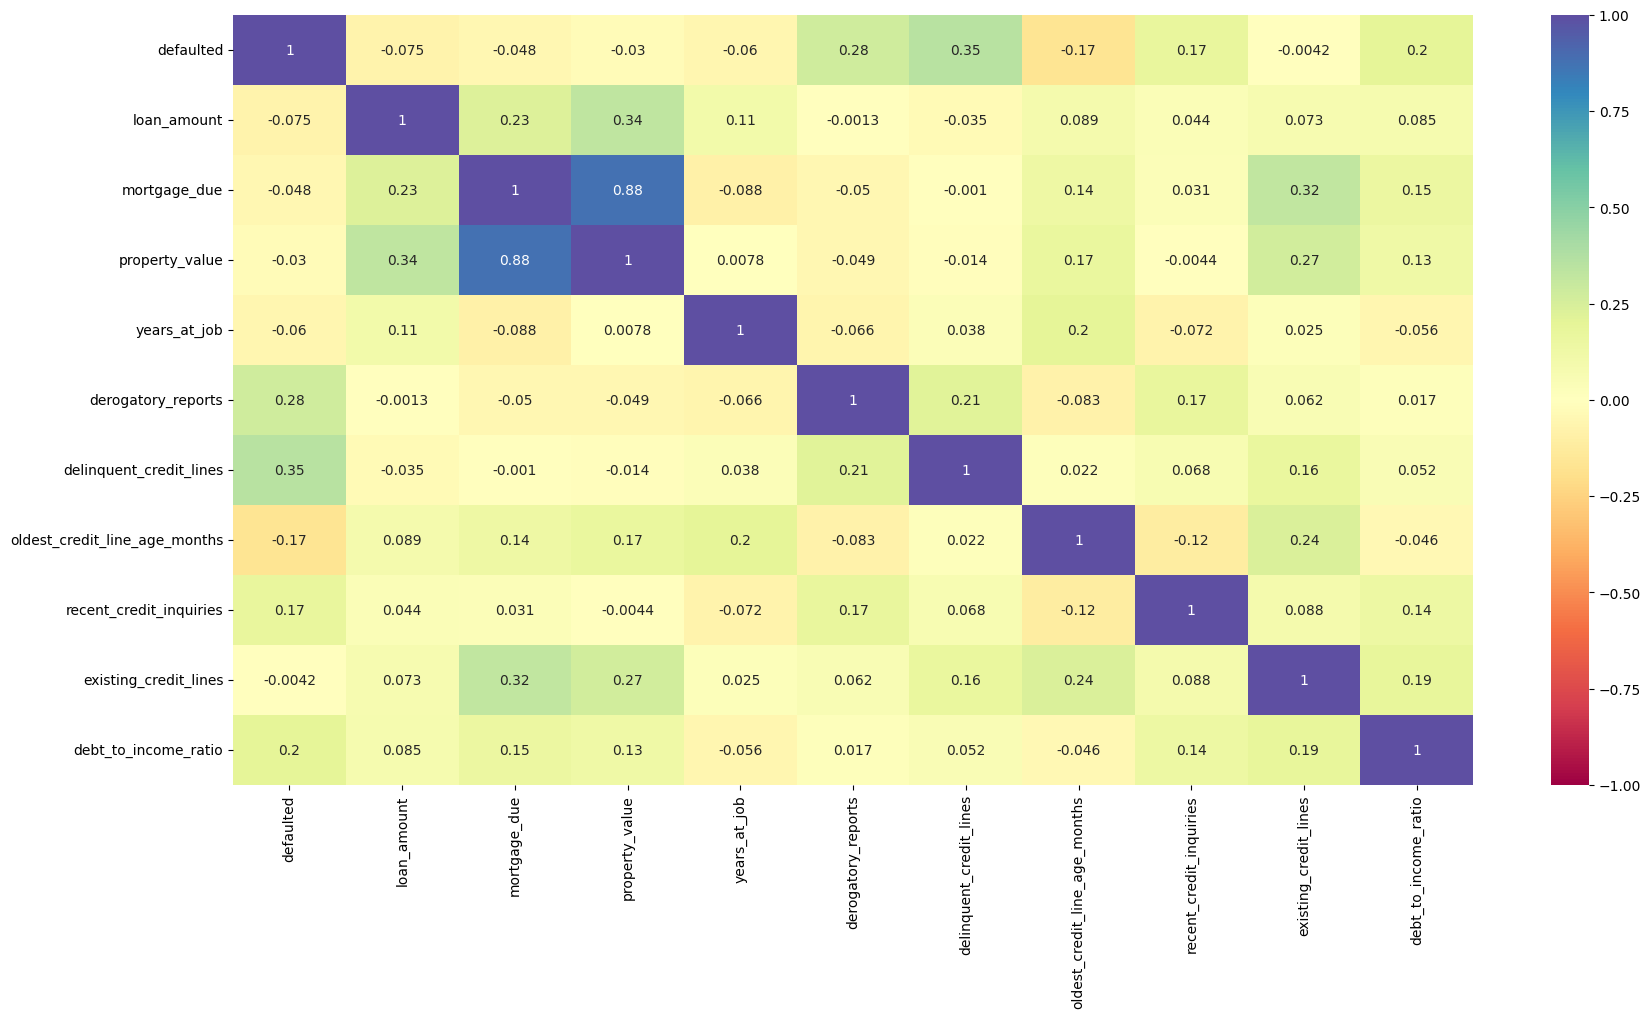

In [282]:
# Check the correlation between numeric variables
plt.figure(figsize=(20, 10))

sns.heatmap(numeric_df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)

plt.show()

- The only significant correlation is the positive correlation between property value and how much is due on the mortgage, which makes sense.

- There is moderate positive correlation between the number of delinquent credit lines a customer has and defaulting on their loan.

- There is also moderate positive correlation between the loan amount and property value and existing credit lines and mortgage due.

#### **Categorical Numerical Analysis**

In [283]:
# Function for analyzing categorical and numeric variables
def boxplot_barplot(df, x, y):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    fig.suptitle(f'Boxplot and Barplot for {x} and {y}')

    sns.boxplot(df, x=x, y=y, order=df[x].value_counts().index, ax=axes[0])
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    sns.barplot(df, x=x, y=y, order=df[x].value_counts().index, ax=axes[1])
    # axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

    plt.show();

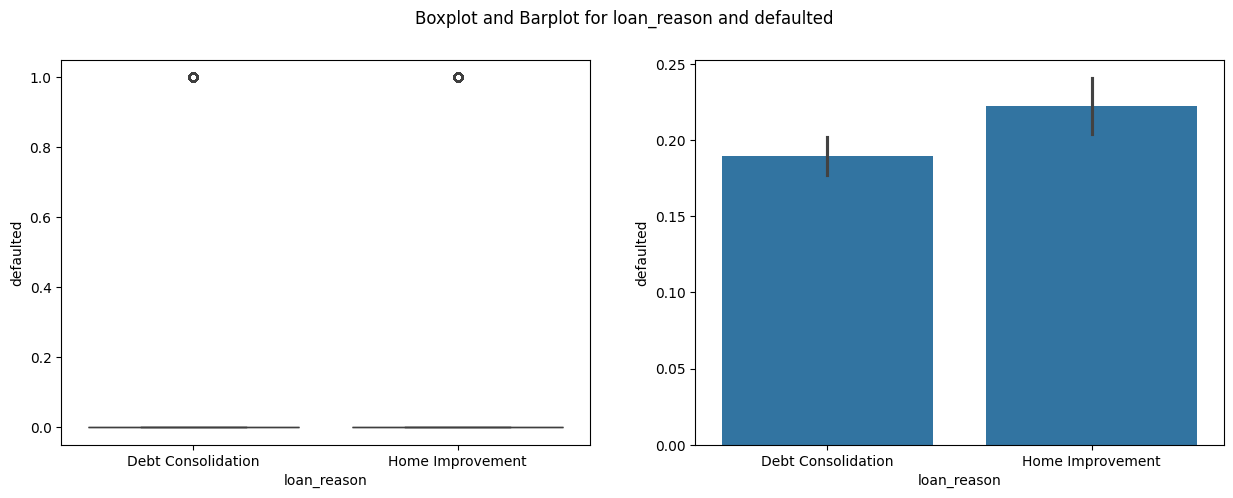

In [284]:
boxplot_barplot(df, 'loan_reason', 'defaulted')

- Those that took out a loan for home improvement defaulted at a slightly greater average rate than those that did debt consolidation.

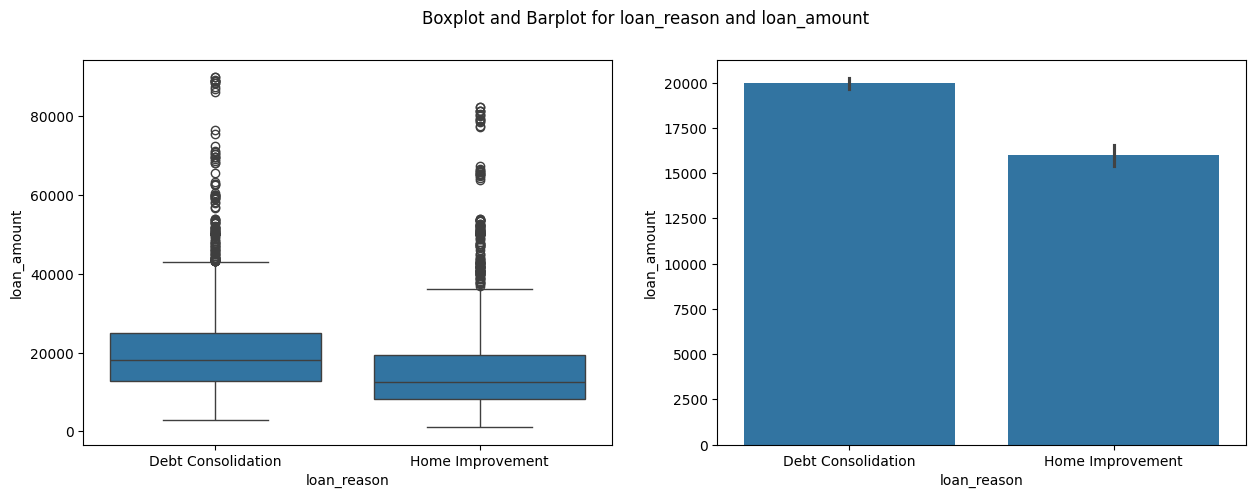

In [285]:
boxplot_barplot(df, 'loan_reason', 'loan_amount')

- Loan amounts were higher, on average, for those that took out debt consolidation loans.

- This is of interest because customers with home improvement loans tended to default at a slightly higher rate despite having lower loan amounts.

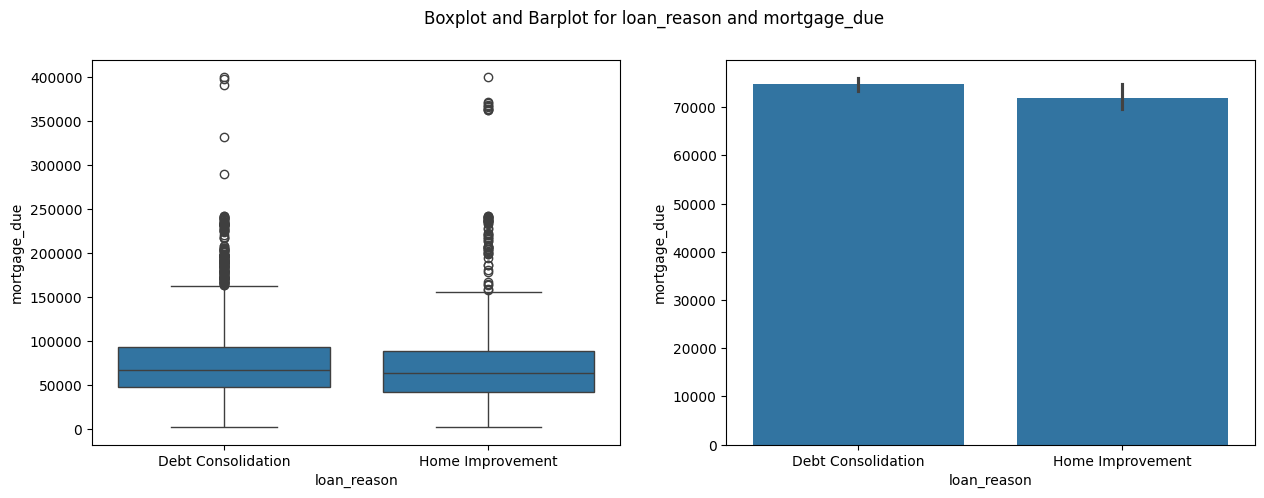

In [286]:
boxplot_barplot(df, 'loan_reason', 'mortgage_due')

- There is very little difference in the average amount of mortgage due for both Debt Consolidation and Home Improvement reasons.

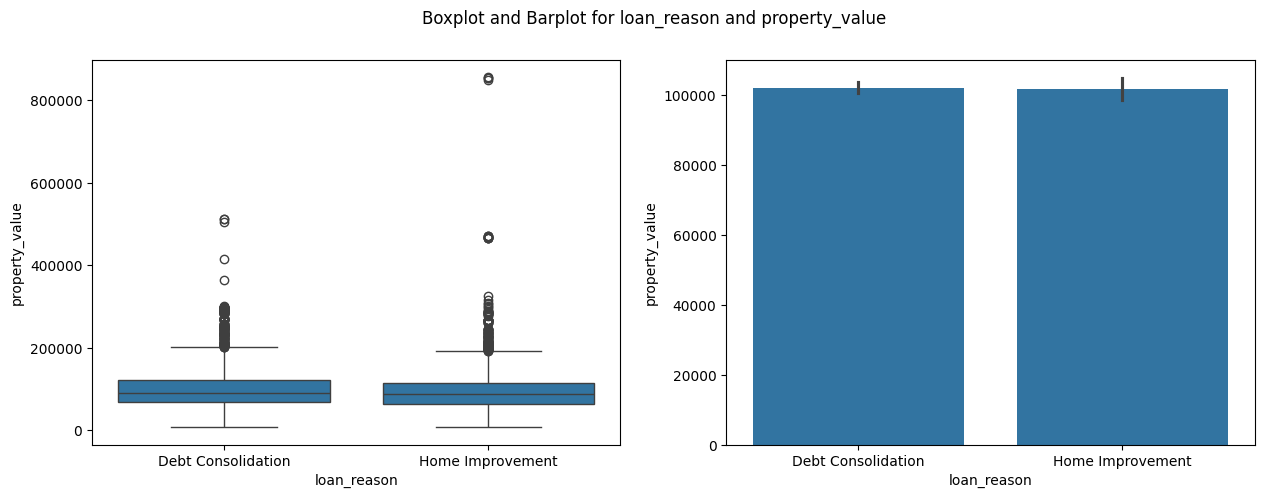

In [287]:
boxplot_barplot(df, 'loan_reason', 'property_value')

- The average property values for both Debt Consolidation and Home Improvement reasons are virtually identical with Home Improvement having the greater outliers.

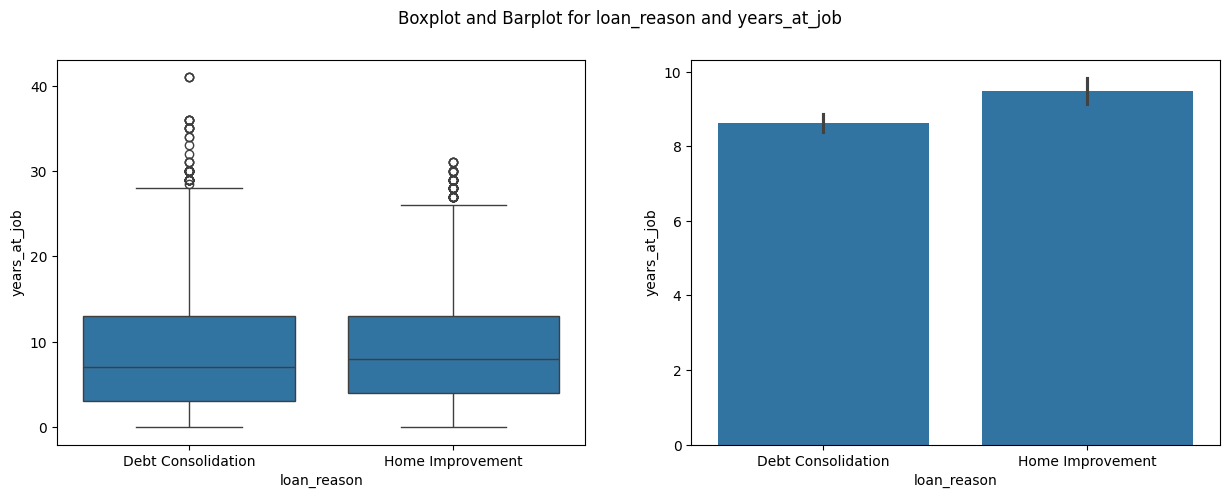

In [288]:
boxplot_barplot(df, 'loan_reason', 'years_at_job')

- Those that took out loans for home improvement tend to be at their jobs just a bit longer - but not significantly longer, on average. Those with debt consolidation have the greater outliers.

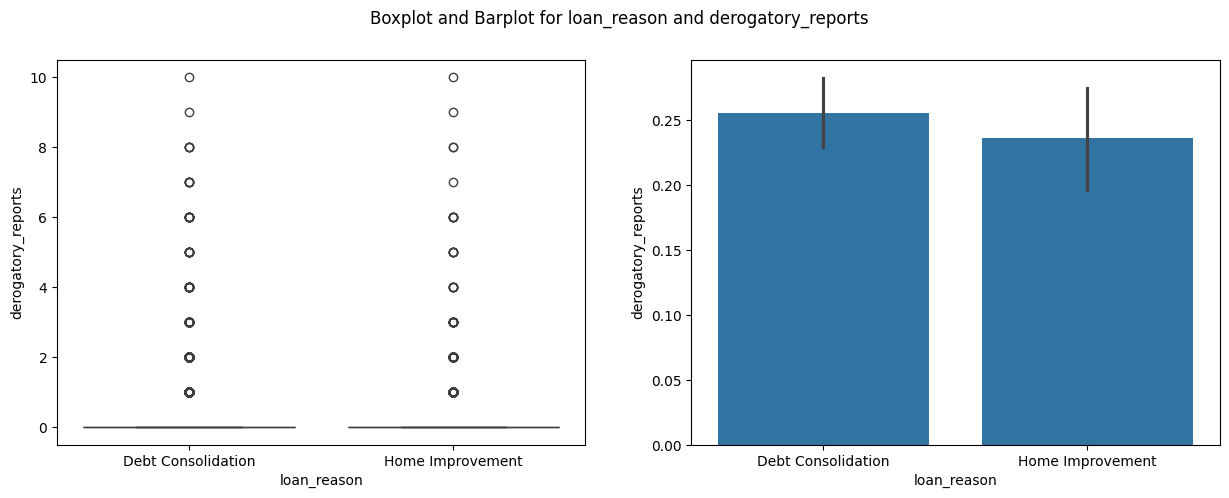

In [289]:
boxplot_barplot(df, 'loan_reason', 'derogatory_reports')

- The difference in derogatory reports between the loan reasons is insignificant.

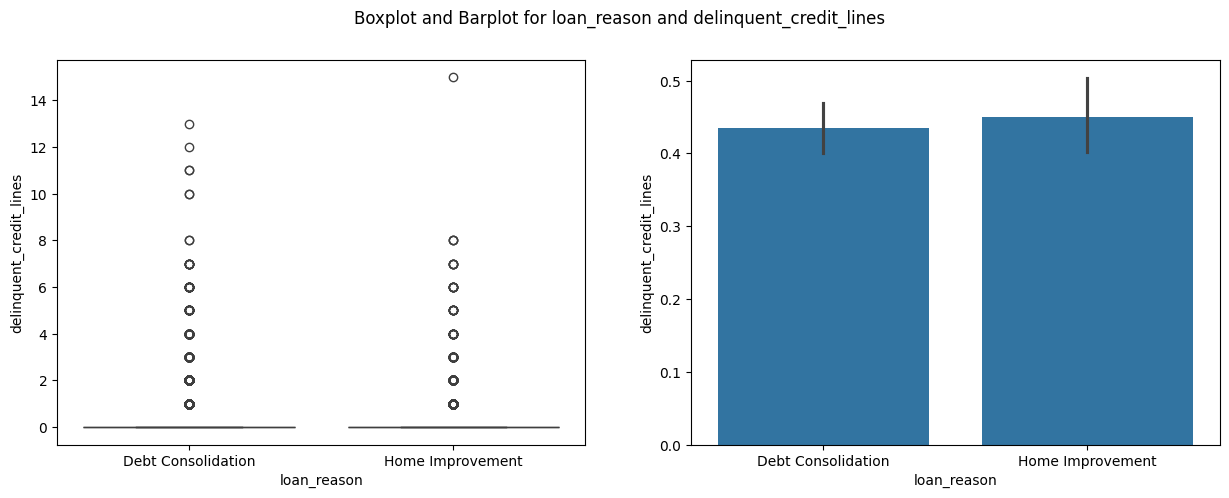

In [290]:
boxplot_barplot(df, 'loan_reason', 'delinquent_credit_lines')

- Insignificant difference in the average number of delinquent lines for each loan reason.

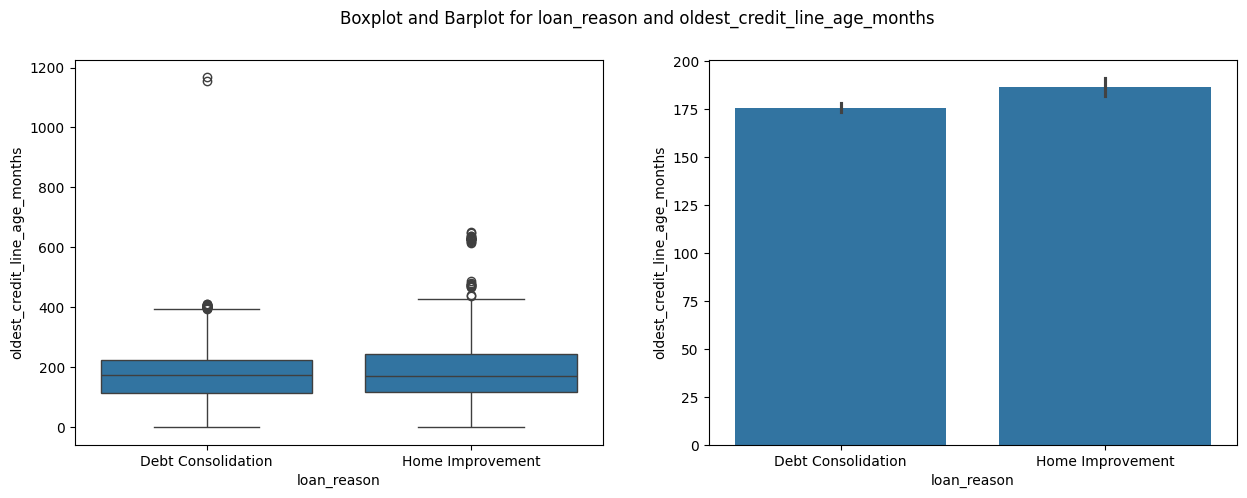

In [291]:
boxplot_barplot(df, 'loan_reason', 'oldest_credit_line_age_months')

- Those that took out home improvement loans have, on average, slightly older oldest credit line than those with debt consolidation. Those with Debt Consolidation have the highest outliers.

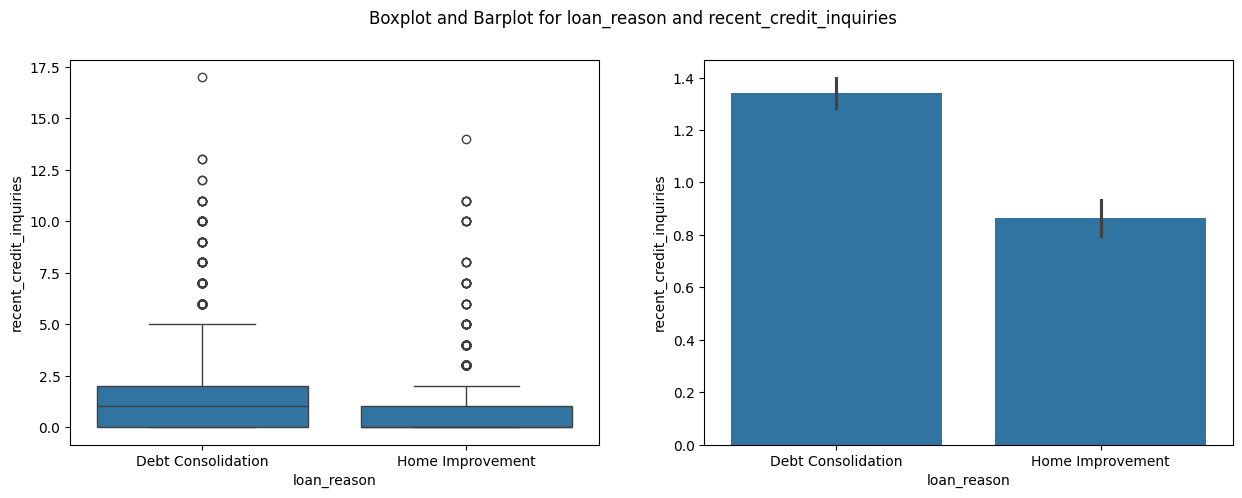

In [292]:
boxplot_barplot(df, 'loan_reason', 'recent_credit_inquiries')

- Those with debt consolidation loans had, on average, significantly more recent credit inquiries than those with home improvement.

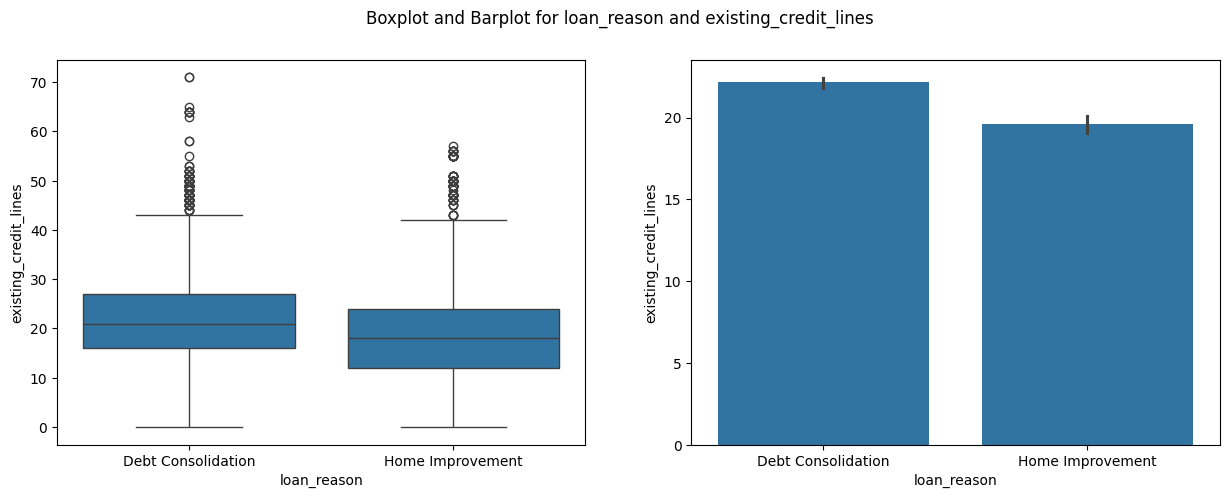

In [293]:
boxplot_barplot(df, 'loan_reason', 'existing_credit_lines')

- Those with loans for debt consolidation have, on average, slightly more existing credit lines, than those with reason Home Improvement.

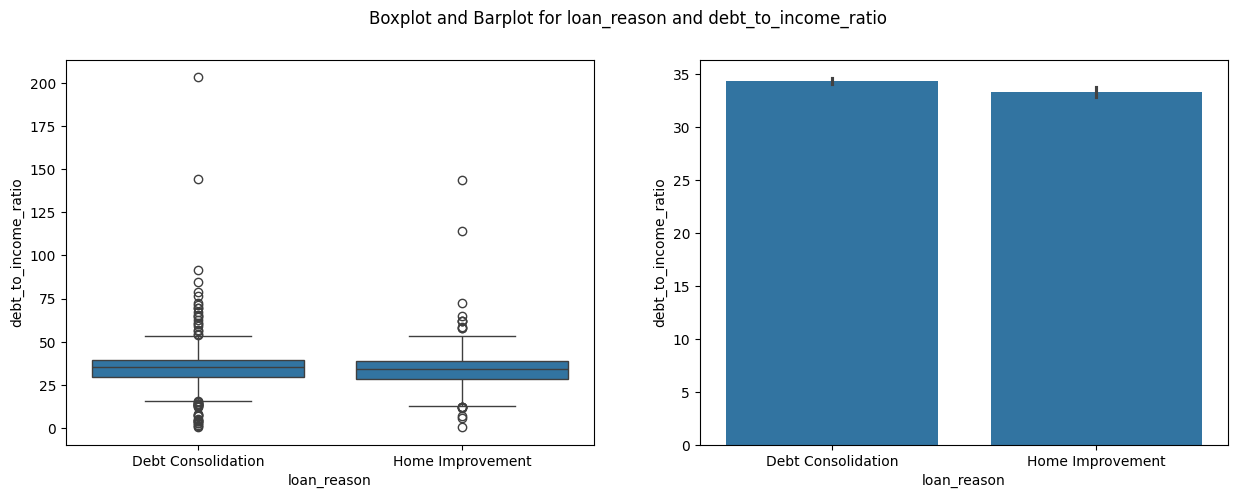

In [294]:
boxplot_barplot(df, 'loan_reason', 'debt_to_income_ratio')

- The average debt-to-income ratio is very similar in both loan reasons with debt consolidation only slightly higher and with greater outliers.

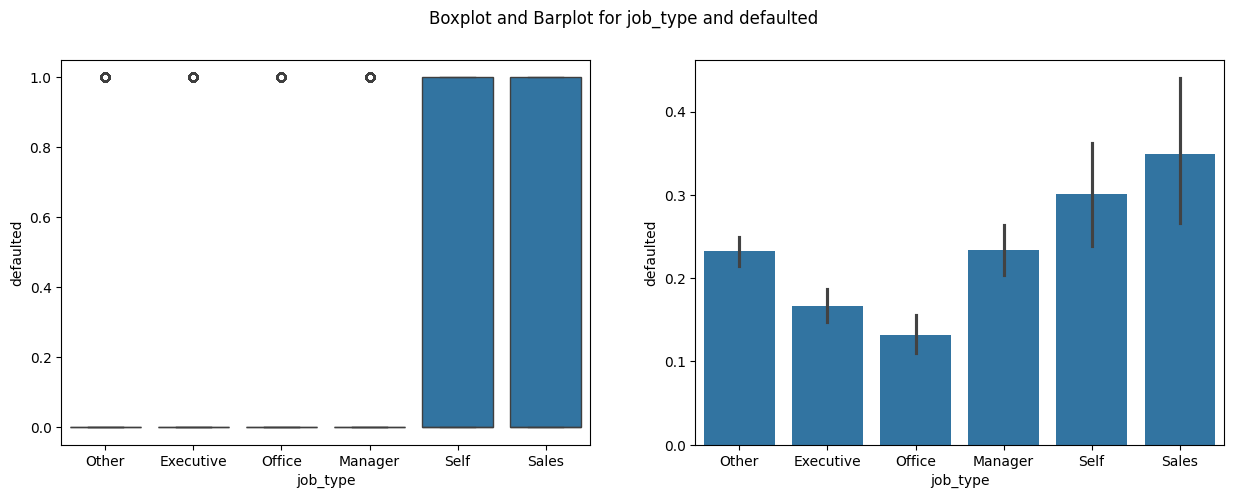

In [295]:
boxplot_barplot(df, 'job_type', 'defaulted')

- Those with jobs in Sales have the highest average rate of default. This makes sense as sales can be very volatile and inconsistent and those that are self-employed only make money when they work and probably not while they take time off.

- Those with an executive or office job had the lowest average rate of default.

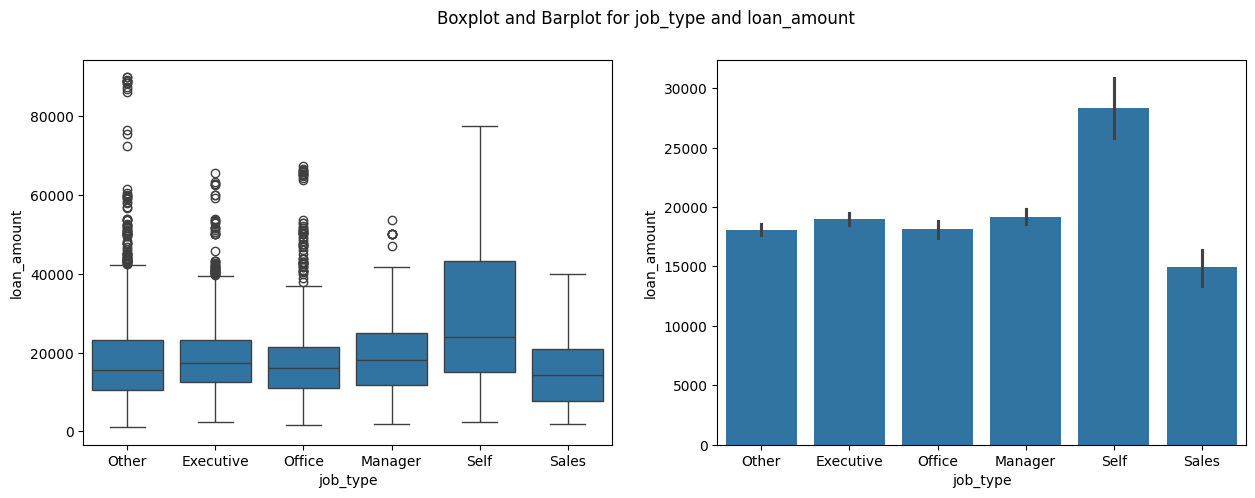

In [296]:
boxplot_barplot(df, 'job_type', 'loan_amount')

- Self-employed customers took out the highest average loan amounts by far with those in Sales taking out the smallest amounts.

- The other, executive, office, and manager roles had very similar average amounts with Other job type having the highest outliers.

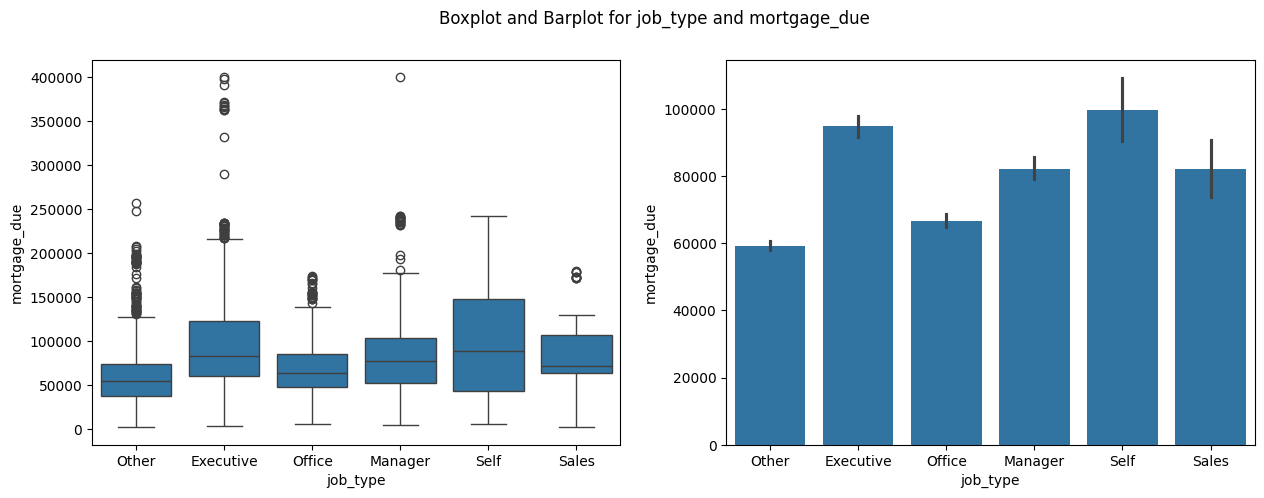

In [297]:
boxplot_barplot(df, 'job_type', 'mortgage_due')

- Those that are executives or self-employed have the highest average mortgages due and Executives have the highest outliers.

- Significant outliers for executives and managers.

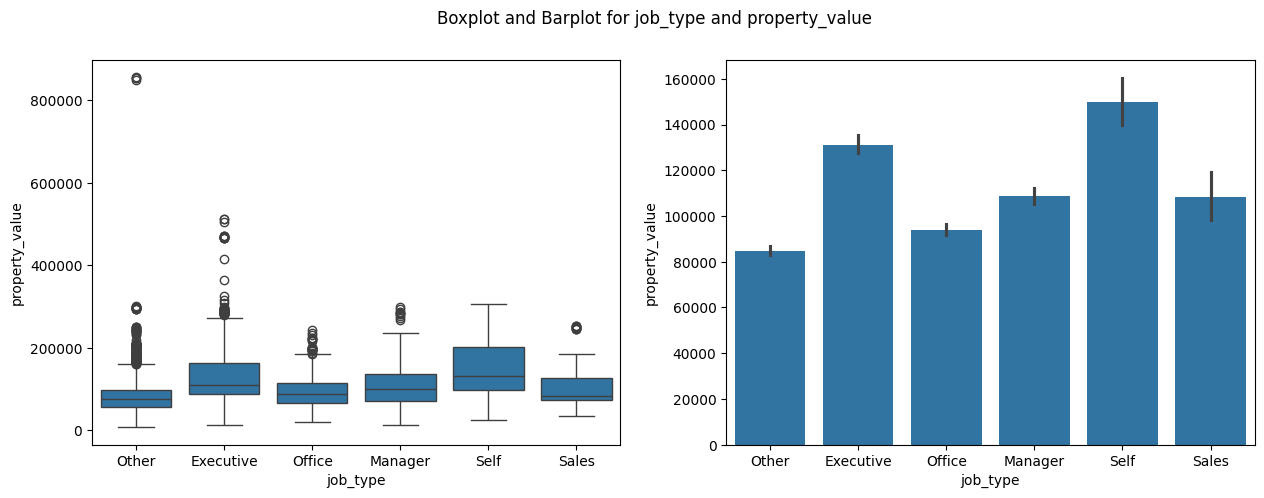

In [298]:
boxplot_barplot(df, 'job_type', 'property_value')

- The Self-employed have the highest average property values and the Other job type has the highest outliers.

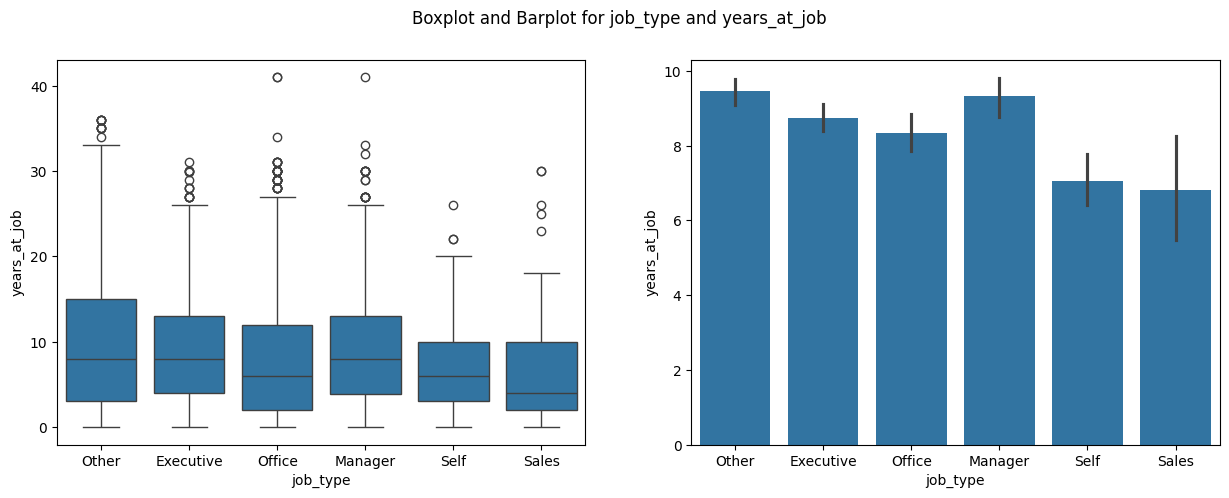

In [299]:
boxplot_barplot(df, 'job_type', 'years_at_job')

- Those in Other jobs and Managers have the longer average time on the job with those in Sales and Self-employed with the least average amount on the job.

- Office and Managers have the highest outliers.

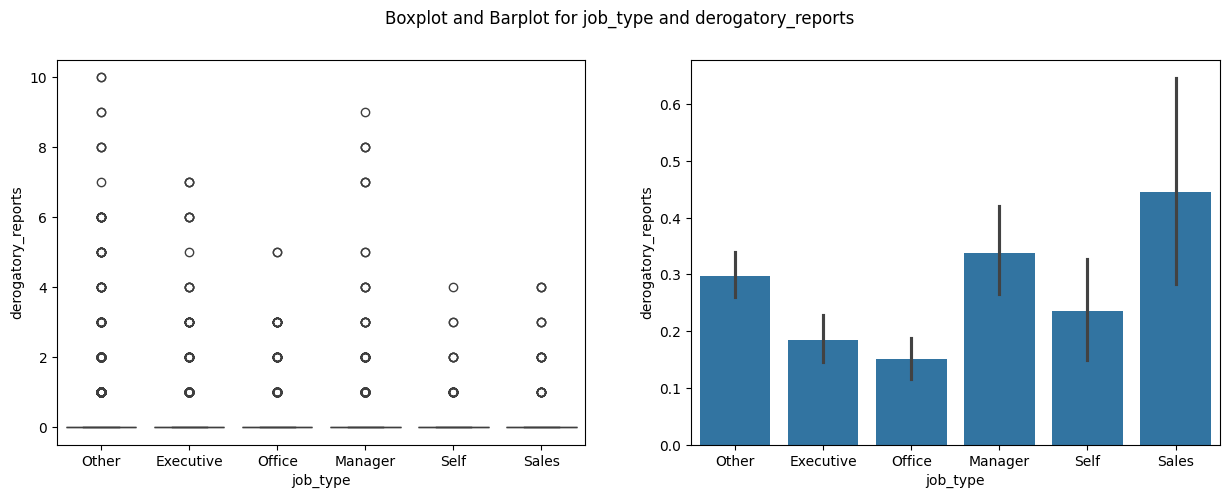

In [300]:
boxplot_barplot(df, 'job_type', 'derogatory_reports')

- Those in Sales have the highest average amount of derogatory reports with those in office jobs having the lowest average amount.

- Other job type has the highest outliers.

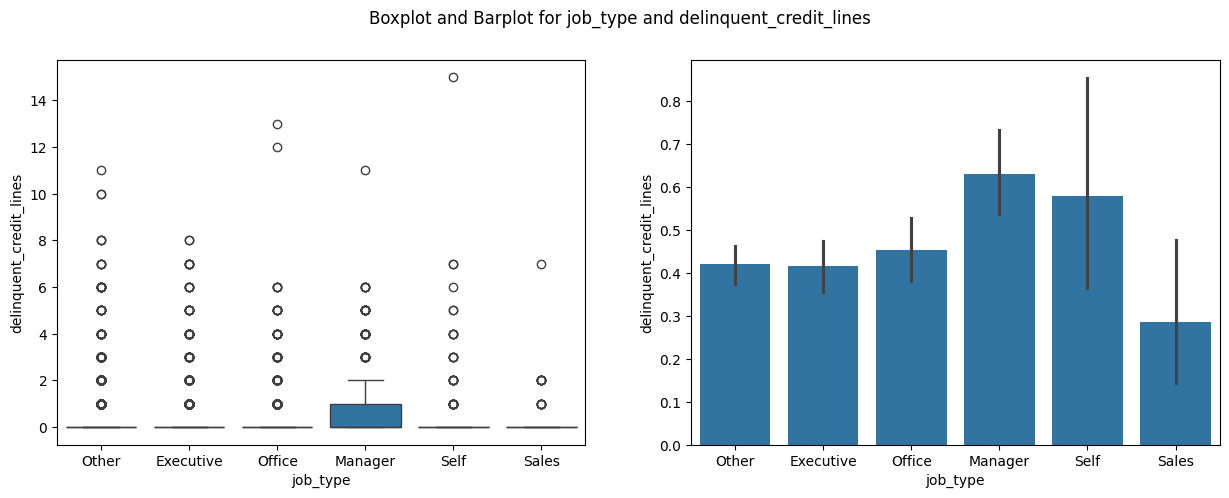

In [301]:
boxplot_barplot(df, 'job_type', 'delinquent_credit_lines')

- Managers and the Self-employed have the highest average number of delinquent credit lines with the Self-employed having the highest outlier.

- Those in sales have the lowest average number of delinquent lines of credit.

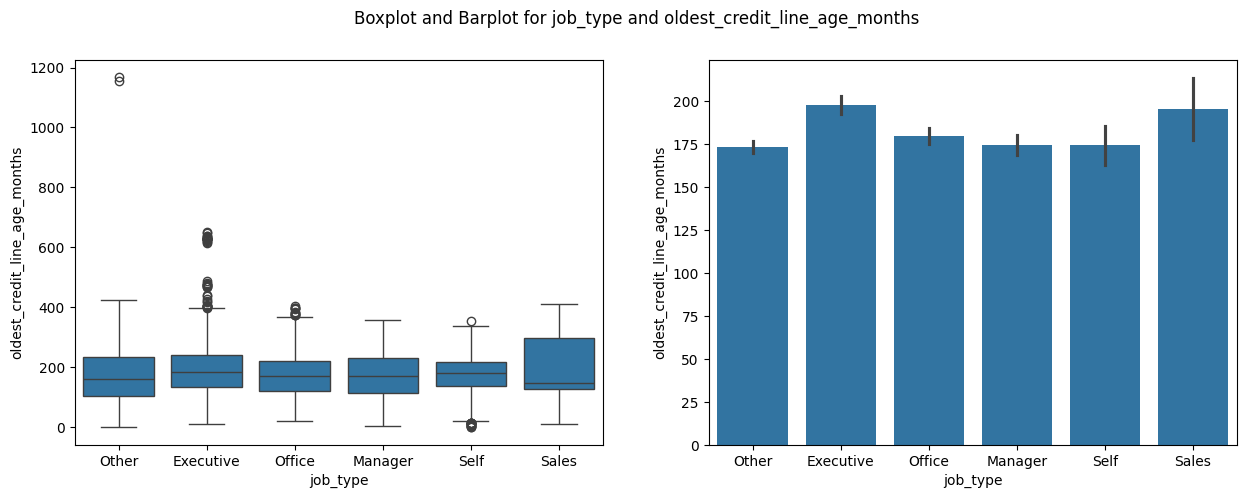

In [302]:
boxplot_barplot(df, 'job_type', 'oldest_credit_line_age_months')

- Executives and those in Sales have the highest average oldest credit line with Other job type having the highest outliers.

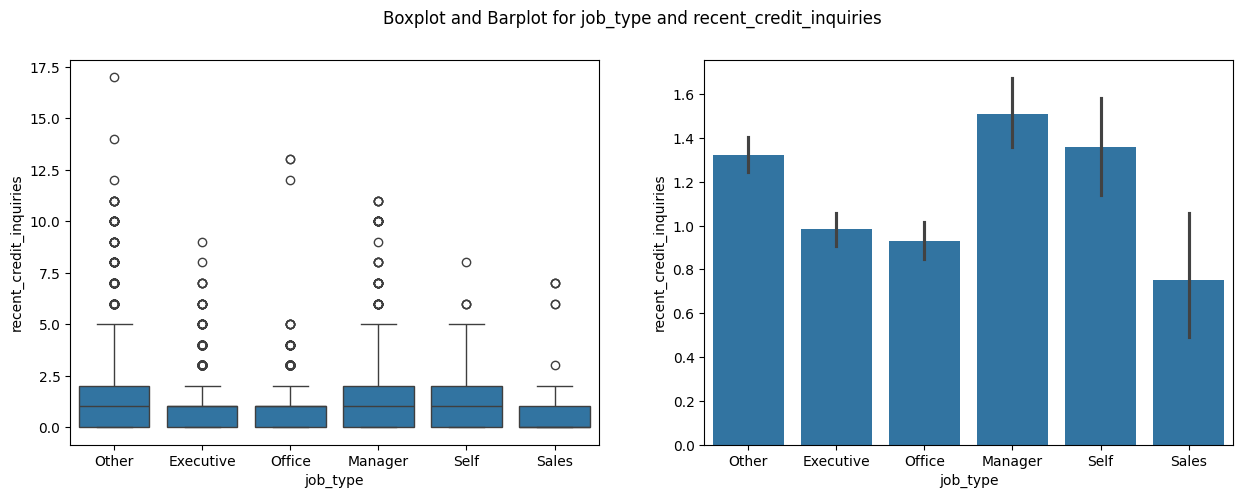

In [303]:
boxplot_barplot(df, 'job_type', 'recent_credit_inquiries')

- Managers, the Self-employed, and Other job types had the highest average recent credit inquiries. Other job type have the highest outliers.

- Those in Sales had the lowest average amount of recent credit inquiries.

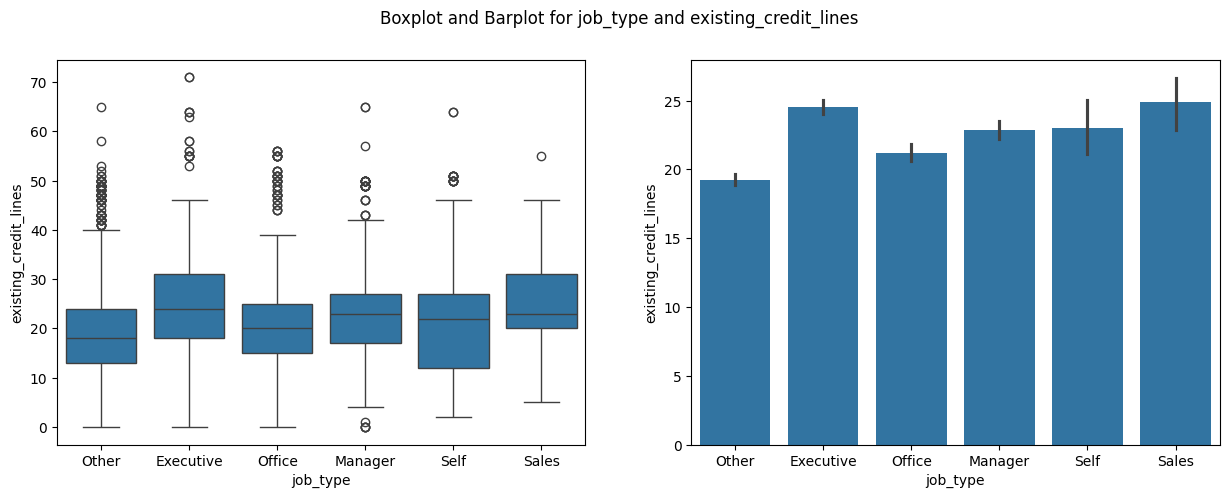

In [304]:
boxplot_barplot(df, 'job_type', 'existing_credit_lines')

- Executives and those in Sales had the highest average of existing credit lines and Executives had the highest outliers.

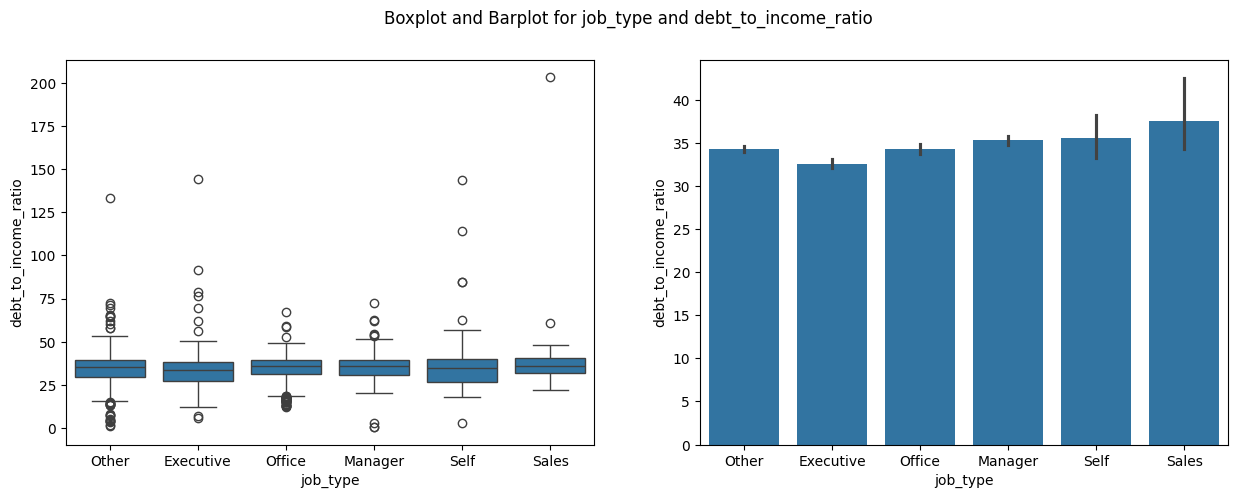

In [305]:
boxplot_barplot(df, 'job_type', 'debt_to_income_ratio')

- The average debt-to-income ratio for all the job types are similar with those in sales slightly higher than the rest and the executives slightly having the least.

- Sales has the biggest outlier.

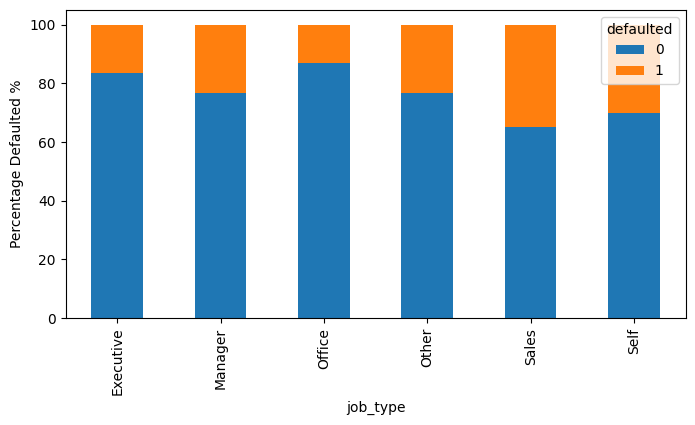

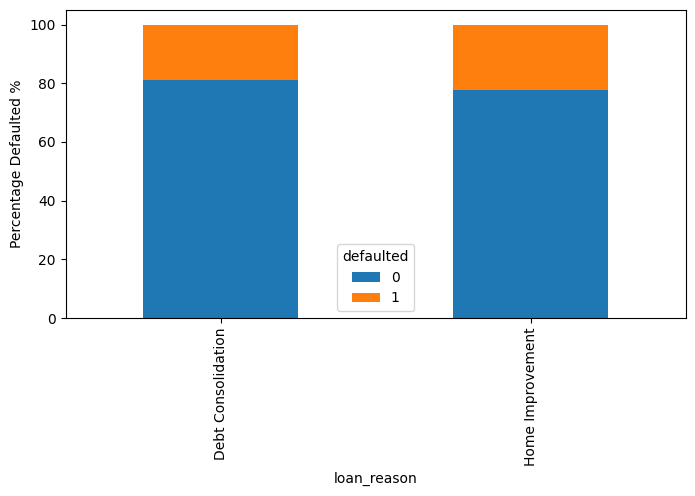

In [306]:
cat_columns = ['defaulted', 'job_type', 'loan_reason']

for column in cat_columns:

    if column != 'defaulted':

        (pd.crosstab(df[column], df['defaulted'], normalize = 'index') * 100).plot(kind = 'bar', figsize = (8, 4), stacked = True)

        plt.ylabel('Percentage Defaulted %')

## Treating Outliers

In [307]:
df.shape

(5960, 13)

In [308]:
# Check which records have unrealisticly high credit line age
df[df['oldest_credit_line_age_months'] > 1000]

,defaulted,loan_amount,mortgage_due,property_value,loan_reason,job_type,years_at_job,derogatory_reports,delinquent_credit_lines,oldest_credit_line_age_months,recent_credit_inquiries,existing_credit_lines,debt_to_income_ratio
3097,1,16800,87300.0,155500.0,Debt Consolidation,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,NaN
3679,1,19300,96454.0,157809.0,Debt Consolidation,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,40.206138


In [309]:
# Since only two records exist, will drop them
df = df.drop([3097, 3679]).reset_index(drop=True)

In [310]:
# Extract series of credit lines that are greater than the 75th percentile
df_credit_line_outliers = df[df['existing_credit_lines'] > 26]

df.loc[df['existing_credit_lines'] > 50, 'existing_credit_lines'] = 50

## Treating Missing Values

In [311]:
# We will assume that if there are null values in the following columns, that implicitly means the borrower has no delinquencies, credit inquiries
df.fillna({'delinquent_credit_lines': 0}, inplace=True)

df.fillna({'recent_credit_inquiries': 0}, inplace=True)

df.fillna({'derogatory_reports': 0}, inplace=True)

In [312]:
# Temporarily setting the null values to zero to help impute later
df.loc[df['property_value'].isnull(), 'property_value'] = 0

In [313]:
# Temporarily setting the null values to zero to help impute later
df.loc[df['mortgage_due'].isnull(), 'mortgage_due'] = 0

In [314]:
# We will use the mode to impute the null values for job type
df.loc[df['job_type'].isnull(), 'job_type'] = 'Other'

In [315]:
# Calculate the proportions for each loan reason
debt_consolidation_ratio = df['loan_reason'].value_counts(normalize=True)['Debt Consolidation']
home_improvement_ratio = df['loan_reason'].value_counts(normalize=True)['Home Improvement']

# Randomly assign missing values based on these proportions
df.loc[df['loan_reason'].isnull(), 'loan_reason'] = np.random.choice(['Debt Consolidation', 'Home Improvement'], size=df['loan_reason'].isnull().sum(), p=[debt_consolidation_ratio, home_improvement_ratio])

In [316]:
# Relationship between two columns and a target third in order to immpute values more accurately in the target column
def plot_pivot_heatmap(df, column1, column2, column_to_impute):

    fig = plt.figure(figsize = (18, 3))

    sns.heatmap(df.pivot_table(index=column1, columns=column2, values=column_to_impute), annot=True)


    plt.show()



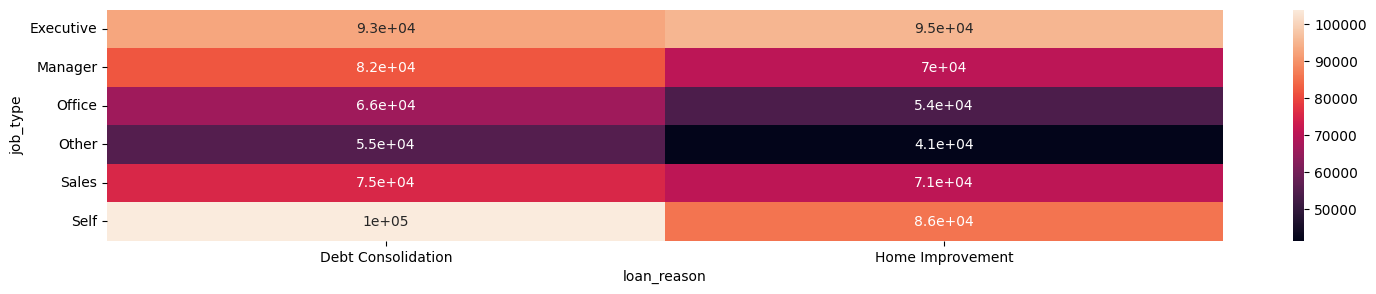

In [317]:
# Relationship between the following features
plot_pivot_heatmap(df, 'job_type', 'loan_reason', 'mortgage_due')

In [318]:
sum(df['mortgage_due'] == 0)

518

In [319]:
df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Executive'), 'mortgage_due'] = 93000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Manager'), 'mortgage_due'] = 82000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Office'), 'mortgage_due'] = 66000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Other'), 'mortgage_due'] = 56000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Sales'), 'mortgage_due'] = 75000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Self'), 'mortgage_due'] = 100000


df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Executive'), 'mortgage_due'] = 96000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Manager'), 'mortgage_due'] = 69000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Office'), 'mortgage_due'] = 55000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Other'), 'mortgage_due'] = 41000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Sales'), 'mortgage_due'] = 71000

df.loc[(df['mortgage_due'] == 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Self'), 'mortgage_due'] = 86000

In [320]:
sum(df['mortgage_due'] == 0)

0

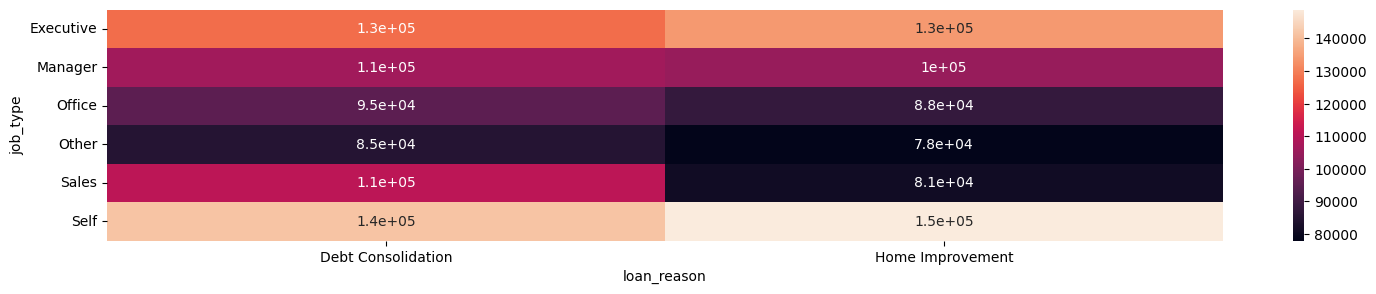

In [321]:
plot_pivot_heatmap(df, 'job_type', 'loan_reason', 'property_value')

In [322]:
sum(df['property_value'] == 0)

112

In [323]:
df.loc[(df['property_value'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Executive'), 'property_value'] = 130000

df.loc[(df['property_value']== 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Manager'), 'property_value'] = 110000

df.loc[(df['property_value'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Office'), 'property_value'] = 95000

df.loc[(df['property_value'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Other'), 'property_value'] = 85000

df.loc[(df['property_value'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Sales'), 'property_value'] = 110000

df.loc[(df['property_value'] == 0) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Self'), 'property_value'] = 140000


df.loc[(df['property_value'] == 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Executive'), 'property_value'] = 130000

df.loc[(df['property_value']== 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Manager'), 'property_value'] = 100000

df.loc[(df['property_value']== 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Office'), 'property_value'] = 89000

df.loc[(df['property_value']== 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Other'), 'property_value'] = 78000

df.loc[(df['property_value']== 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Sales'), 'property_value'] = 81000

df.loc[(df['property_value']== 0) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Self'), 'property_value'] = 150000

In [324]:
sum(df['property_value'] == 0)

0

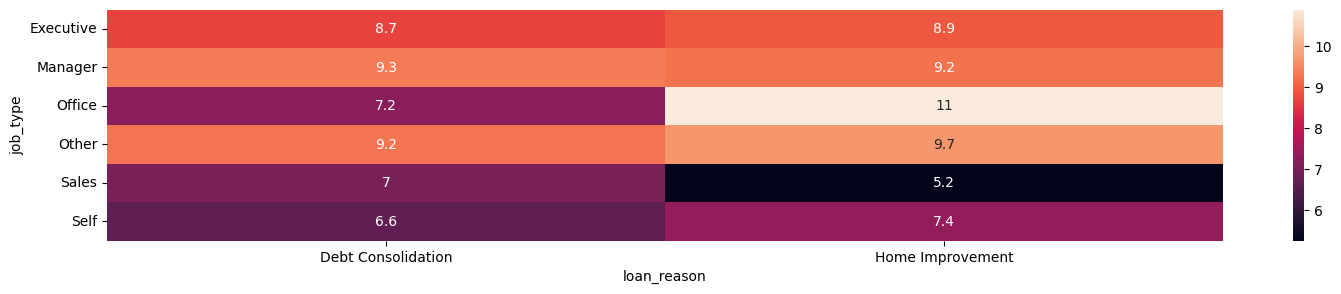

In [325]:
# Relationship between the following features
plot_pivot_heatmap(df, 'job_type', 'loan_reason', 'years_at_job')

In [326]:
sum(df['years_at_job'].isnull())

515

In [327]:
df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Executive'), 'years_at_job'] = 8.7

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Manager'), 'years_at_job'] = 9.4

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Office'), 'years_at_job'] = 7.2

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Other'), 'years_at_job'] = 9.2

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Sales'), 'years_at_job'] = 7.0

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Self'), 'years_at_job'] = 6.7


df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Executive'), 'years_at_job'] = 8.9

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Manager'), 'years_at_job'] = 9.1

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Office'), 'years_at_job'] = 11

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Other'), 'years_at_job'] = 9.7

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Sales'), 'years_at_job'] = 5.2

df.loc[(df['years_at_job'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Self'), 'years_at_job'] = 7.3

In [328]:
sum(df['years_at_job'].isnull())

0

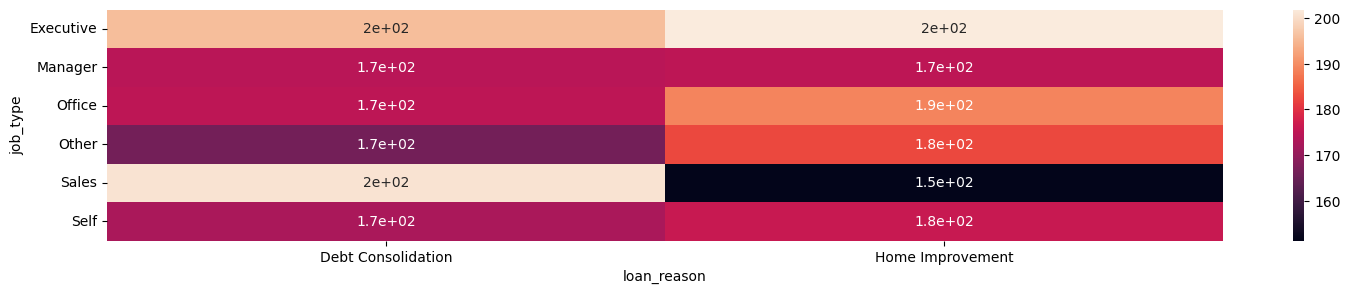

In [329]:
plot_pivot_heatmap(df, 'job_type', 'loan_reason', 'oldest_credit_line_age_months')

In [330]:
df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Executive'), 'oldest_credit_line_age_months'] = 200

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Manager'), 'oldest_credit_line_age_months'] = 170

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Office'), 'oldest_credit_line_age_months'] = 170

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Other'), 'oldest_credit_line_age_months'] = 170

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Sales'), 'oldest_credit_line_age_months'] = 200

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Self'), 'oldest_credit_line_age_months'] = 170


df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Executive'), 'oldest_credit_line_age_months'] = 200

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Manager'), 'oldest_credit_line_age_months'] = 170

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Office'), 'oldest_credit_line_age_months'] = 190

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Other'), 'oldest_credit_line_age_months'] = 180

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Sales'), 'oldest_credit_line_age_months'] = 150

df.loc[(df['oldest_credit_line_age_months'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Self'), 'oldest_credit_line_age_months'] = 180

In [331]:
sum(df['oldest_credit_line_age_months'].isnull())

0

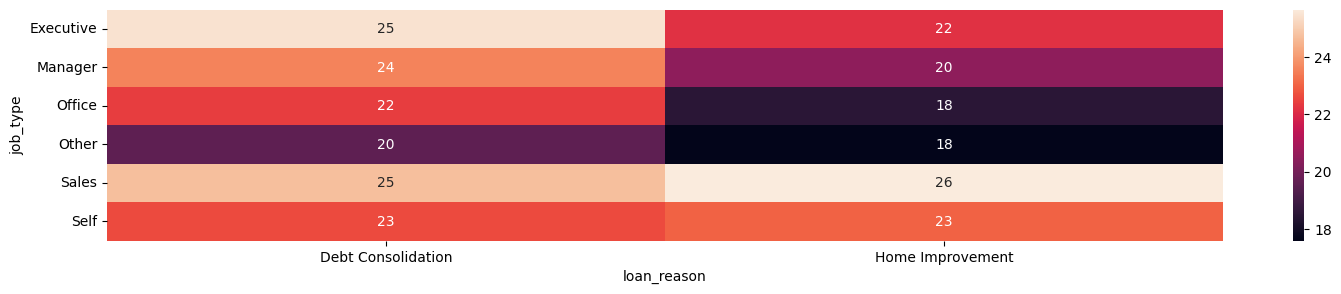

In [332]:
plot_pivot_heatmap(df, 'job_type', 'loan_reason', 'existing_credit_lines')

In [333]:
df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Executive'), 'existing_credit_lines'] = 25

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Manager'), 'existing_credit_lines'] = 24

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Office'), 'existing_credit_lines'] = 22

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Other'), 'existing_credit_lines'] = 20

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Sales'), 'existing_credit_lines'] = 25

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Self'), 'existing_credit_lines'] = 23


df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Executive'), 'existing_credit_lines'] = 22

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Manager'), 'existing_credit_lines'] = 20

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Office'), 'existing_credit_lines'] = 18

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Other'), 'existing_credit_lines'] = 18

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Sales'), 'existing_credit_lines'] = 26

df.loc[(df['existing_credit_lines'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Self'), 'existing_credit_lines'] = 23

In [334]:
sum(df['debt_to_income_ratio'].isnull())

1266

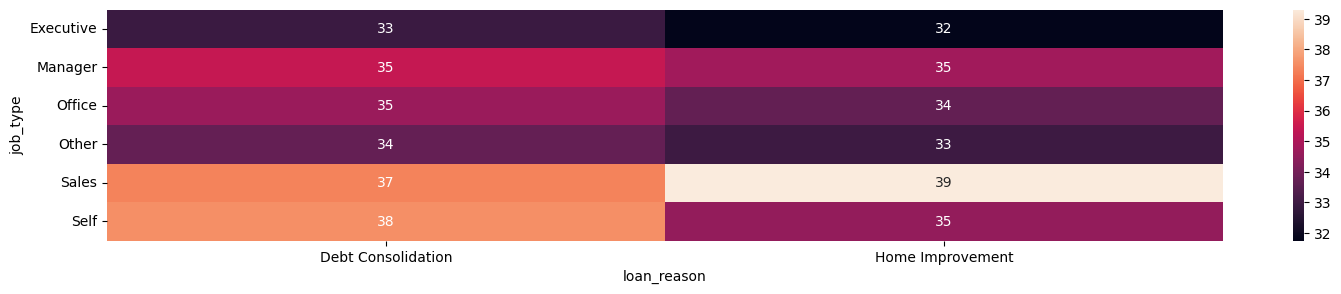

In [335]:
# Relationship between the following features
plot_pivot_heatmap(df, 'job_type', 'loan_reason', 'debt_to_income_ratio')

In [336]:
df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Executive'), 'debt_to_income_ratio'] = 33

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Manager'), 'debt_to_income_ratio'] = 35

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Office'), 'debt_to_income_ratio'] = 35

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Other'), 'debt_to_income_ratio'] = 34

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Sales'), 'debt_to_income_ratio'] = 37

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Debt Consolidation') & (df['job_type'] == 'Self'), 'debt_to_income_ratio'] = 38


df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Executive'), 'debt_to_income_ratio'] = 32

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Manager'), 'debt_to_income_ratio'] = 35

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Office'), 'debt_to_income_ratio'] = 34

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Other'), 'debt_to_income_ratio'] = 33

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Sales'), 'debt_to_income_ratio'] = 39

df.loc[(df['debt_to_income_ratio'].isnull()) & (df['loan_reason'] == 'Home Improvement') & (df['job_type'] == 'Self'), 'debt_to_income_ratio'] = 35

### Rounding Values & Changing data types

In [337]:
# Round to nearest dollar and change the data type for 'mortgage_due'
df['mortgage_due'] = df['mortgage_due'].round(0).astype(int)

# Round to nearest dollar and change the data type for 'property_value'
df['property_value'] = df['property_value'].round(0).astype(int)

# Change the data type for 'derogatory_reports'
df['derogatory_reports'] = df['derogatory_reports'].astype(int)

# Change the data type for 'delinquent_credit_lines'
df['delinquent_credit_lines'] = df['delinquent_credit_lines'].astype(int)

# Round the oldest credit line age to 1 decimal
df['oldest_credit_line_age_months'] = df['oldest_credit_line_age_months'].round(1)

# Change the data type for 'recent_credit_inquiries'
df['recent_credit_inquiries'] = df['recent_credit_inquiries'].astype(int)

# Change the data type for 'existing_credit_lines'
df['existing_credit_lines'] = df['existing_credit_lines'].astype(int)

# Round the debt to income ratio to 1 decimal
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].round(1)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   defaulted                      5958 non-null   int64  
 1   loan_amount                    5958 non-null   int64  
 2   mortgage_due                   5958 non-null   int64  
 3   property_value                 5958 non-null   int64  
 4   loan_reason                    5958 non-null   object 
 5   job_type                       5958 non-null   object 
 6   years_at_job                   5958 non-null   float64
 7   derogatory_reports             5958 non-null   int64  
 8   delinquent_credit_lines        5958 non-null   int64  
 9   oldest_credit_line_age_months  5958 non-null   float64
 10  recent_credit_inquiries        5958 non-null   int64  
 11  existing_credit_lines          5958 non-null   int64  
 12  debt_to_income_ratio           5958 non-null   f

- All missing values have now been imputed

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

**Loan Amounts and Mortgage Due:**

Loan amounts range from \$1,100 to \$89,900 and are skewed to the right.
Mortgage due amounts are also skewed to the right, with outliers starting around \$150,000.

**Property Values:**

Property values are skewed to the right, with outliers greater than \$200,000.

**Years at Job:**

The distribution of years at job is skewed to the right, with outliers starting around 28 years.

**Credit Reports:**

Most customers have no derogatory reports, and the distribution is skewed to the right.
Delinquent credit lines follow a similar pattern to derogatory reports.

**Credit Line Age:**

The age of the oldest credit line is bimodal around 125 and 175 months, skewed to the right with outliers around 400 months.

**Credit Inquiries and Lines:**

About half of the customers have no recent credit inquiries, with a skew to the right around 5 inquiries.
Existing credit lines are multi-modal at 7, 12, 17, 23, 27, 34, and 50, with outliers past 50 credit lines.

**Debt-to-Income Ratio:**

The debt-to-income ratio has outliers on both ends, with a greater skew to the right. The mode is around 40.

**Loan Purpose:**

More than twice as many customers took out loans for debt consolidation compared to home improvement.
Home improvement loans have a slightly higher default rate despite lower average loan amounts.

**Correlations:**

Significant positive correlation between property value and mortgage due.
Moderate positive correlation between delinquent credit lines and loan default.
Moderate positive correlation between loan amount and property value, and between existing credit lines and mortgage due.

**Job Types and Default Rates:**

Sales jobs have the highest average default rate, likely due to income volatility.
Executive and office jobs have the lowest average default rates.
Self-employed customers took out the highest average loan amounts, while those in sales took out the smallest amounts.

**Mortgage and Property Values by Job Type:**

Executives and self-employed have the highest average mortgages due, with executives having the highest outliers.
Self-employed have the highest average property values, while the ‘Other’ job type has the highest outliers.

**Time on Job and Credit Reports by Job Type:**

‘Other’ jobs and managers have the longest average time on the job, while sales and self-employed have the least.
Sales jobs have the highest average derogatory reports, while office jobs have the lowest.

**Credit Lines and Inquiries by Job Type:**

Managers and self-employed have the highest average number of delinquent credit lines.
Executives and sales have the highest average oldest credit lines.
Managers, self-employed, and ‘Other’ job types have the highest average recent credit inquiries.
Executives and sales have the highest average existing credit lines.

**Debt-to-Income Ratio by Job Type:**

The debt-to-income ratio is similar across job types, with sales slightly higher and executives slightly lower.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a customer will default when the customer doesn't default.
2. Predicting a customer will not default when the customer actually defaults.

**Which case is most important?**

- **Predicting a customer will not default when the customer actually defaults.** We want to minimize the predicting of false negatives and increase the true positives(predicting which customers are going to default and actually default)

**How to reduce the false negatives?**

- **We want the Recall to be maximized,** the greater the Recall, the higher the chances of minimizing false negatives.

In [339]:
# Metric function
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Defaulted', 'Defaulted'], yticklabels = ['Not Defaulted', 'Defaulted'])

    plt.xlabel('Predicted')

    plt.show()

In [340]:
def model_performance_classification(model, predictors, target):

    # Predicting the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred, average = 'macro')        # Compute recall

    precision = precision_score(target, pred, average = 'macro')  # Compute precision

    acc = accuracy_score(target, pred)                            # Compute accuracy score

    # Creating a dataframe of metrics

    df_metrics = pd.DataFrame(
        {
            "Precision": precision,
            "Recall": recall,
            "Accuracy": acc
        },

        index = [0]
    )

    return df_metrics

### **Data Preparation**

In [341]:
# Make an additional copy
df_copy = df.copy()

In [342]:
# Creating a list of columns for which we will create dummy variables
categorical_dummies = ['loan_reason', 'job_type']

# Create dummy variables
df = pd.get_dummies(data = df, columns = categorical_dummies, drop_first = True)


# Create dummy variables for the copy of df
df_copy = pd.get_dummies(data = df_copy, columns = categorical_dummies, drop_first = True)

In [343]:
# Separate the target(dependent) variable from the independent variables
Y = df['defaulted']

X = df.drop(['defaulted'], axis = 1)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)


# Separate the target(dependent) variable from the independent variables
Y_ = df_copy['defaulted']

X_ = df_copy.drop(['defaulted'], axis = 1)

# Splitting the data
x_train_, x_test_, y_train_, y_test_ = train_test_split(X_, Y_, test_size = 0.3, random_state = 1, stratify = Y)

In [344]:
bool_columns = ['loan_reason_Home Improvement', 'job_type_Manager','job_type_Office', 'job_type_Other', 'job_type_Sales', 'job_type_Self']


# Convert strings to Boolean and then to integers
x_train_[bool_columns] = x_train_[bool_columns].replace({'True': True, 'False': False}).astype(bool).astype(int)

x_test_[bool_columns] = x_test_[bool_columns].replace({'True': True, 'False': False}).astype(bool).astype(int)

In [345]:
# Scale the data for df
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

### **Logistic Regression**

In [346]:
# Running logistic regression with balanced class weight
lr_model = LogisticRegression(class_weight = 'balanced', random_state = 1)

lr_model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      3339
           1       0.44      0.66      0.53       831

    accuracy                           0.77      4170
   macro avg       0.67      0.73      0.69      4170
weighted avg       0.81      0.77      0.78      4170



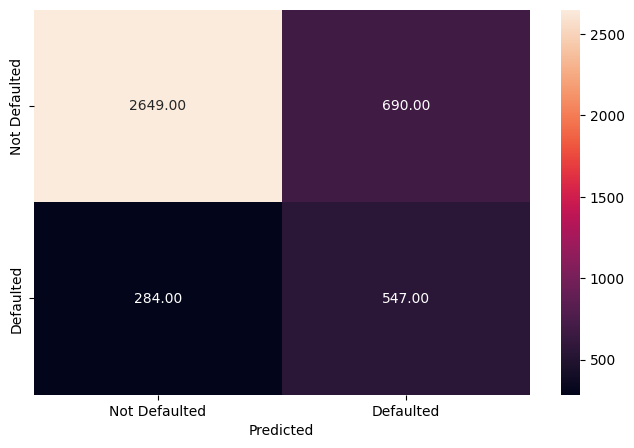

In [347]:
# Predict values
y_train_prediction = lr_model.predict(x_train_scaled)

# Check performace on the training dataset
metrics_score(y_train, y_train_prediction)

In [348]:
y_test_prediction = lr_model.predict(x_test_scaled)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1432
           1       0.46      0.65      0.54       356

    accuracy                           0.78      1788
   macro avg       0.68      0.73      0.70      1788
weighted avg       0.82      0.78      0.79      1788



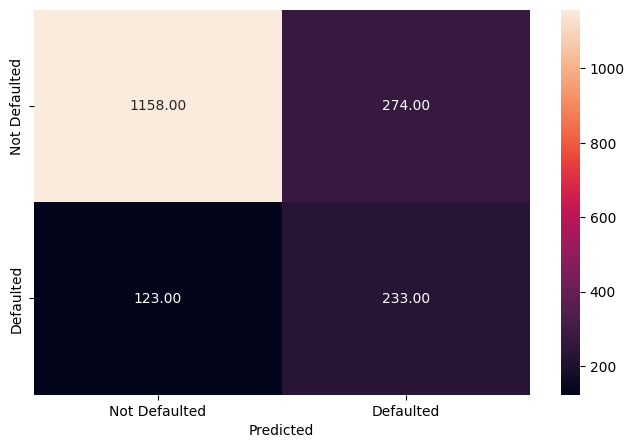

In [349]:
# Check performace on the test dataset
metrics_score(y_test, y_test_prediction)

In [350]:
lr_test = model_performance_classification(lr_model, x_test_scaled, y_test)

In [351]:
lr_test

,Precision,Recall,Accuracy
0,0.681774,0.731577,0.777964


**Insights**

**Model Stability**: The model shows consistent performance between the training and test datasets, indicating good generalization.

**Class Imbalance**: The model performs well for the majority class (Not Defaulted) with high precision and recall, but struggles with the minority class (Defaulted), showing lower precision and recall.



- **Let's check the coefficients and find which variables are leading to default, which can help to reduce defaulting.**

In [352]:
cols = X.columns

coef_lr = lr_model.coef_

# Convert to odds by taking exponent
odds = np.exp(lr_model.coef_[0])

# Add odds to dataframe and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
delinquent_credit_lines,2.483036
derogatory_reports,1.639870
debt_to_income_ratio,1.486605
recent_credit_inquiries,1.253456
property_value,1.195404
loan_reason_Home Improvement,1.142673
job_type_Sales,1.142295
job_type_Self,1.055647
job_type_Manager,1.015098
job_type_Other,1.008076


- **Observations**

- The odds of a customer with delinquent credit lines defaulting on their loan is **2.5 times** higher than one without delinquent credit lines.

- The odds of a customer with derogatory reports defaulting is **1.6 times** higher than one without derogatory reports.

**The Precision-Recall Curve for Logistic Regression**

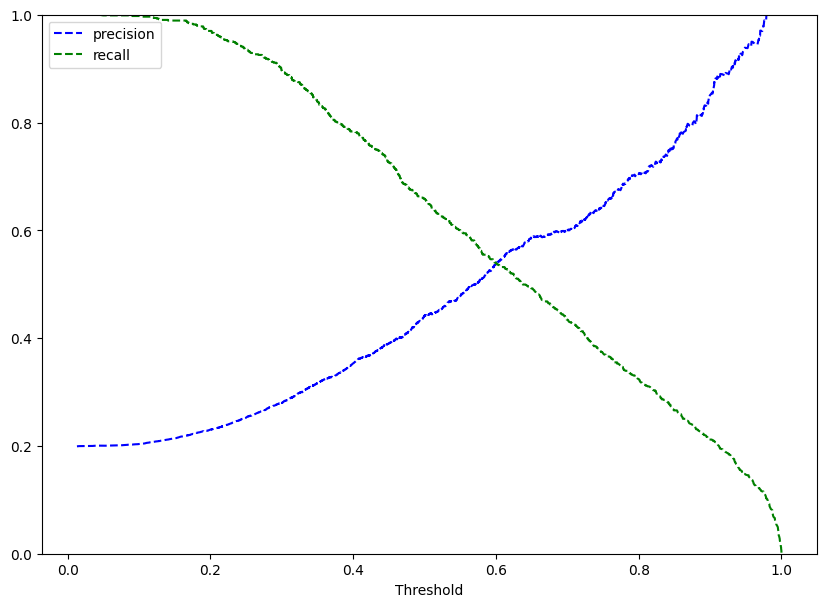

In [353]:
# predict_proba gives the probability of each observation belonging to each class
y_scores_lr = lr_model.predict_proba(x_train_scaled)

precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train, y_scores_lr[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**

- We can see that the precision and the recall are balanced at a threshold of about **0.60**

**Let's find out the performance of the model at this threshold.**

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3339
           1       0.54      0.54      0.54       831

    accuracy                           0.82      4170
   macro avg       0.71      0.71      0.71      4170
weighted avg       0.82      0.82      0.82      4170



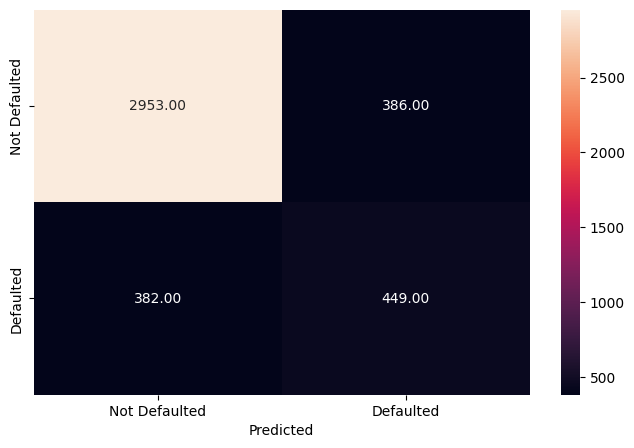

In [354]:
optimal_threshold1 = .60

y_prediction_train = lr_model.predict_proba(x_train_scaled)

metrics_score(y_train, y_prediction_train[:, 1] > optimal_threshold1)

**Observations:**

- Recall has **decreased**.

### **Decision Tree**

#### **Primary Tree**

In [355]:
dt_model_2 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1)

In [356]:
dt_model_2.fit(x_train_, y_train_)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3339
           1       1.00      1.00      1.00       831

    accuracy                           1.00      4170
   macro avg       1.00      1.00      1.00      4170
weighted avg       1.00      1.00      1.00      4170



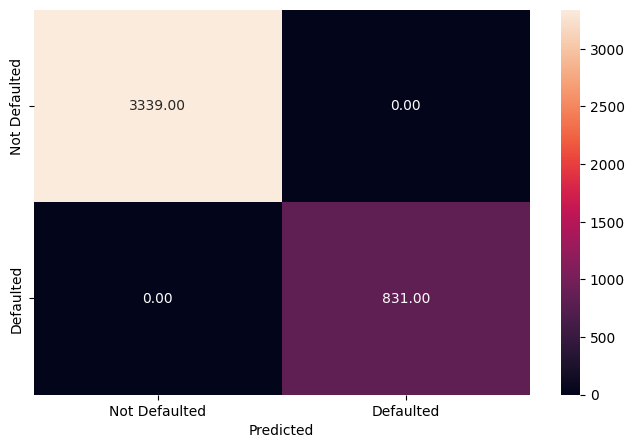

In [357]:
# Check performance on the training dataset
y_train_prediction_df_copy = dt_model_2.predict(x_train_)

metrics_score(y_train_, y_train_prediction_df_copy)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1432
           1       0.69      0.59      0.64       356

    accuracy                           0.87      1788
   macro avg       0.80      0.76      0.78      1788
weighted avg       0.86      0.87      0.86      1788



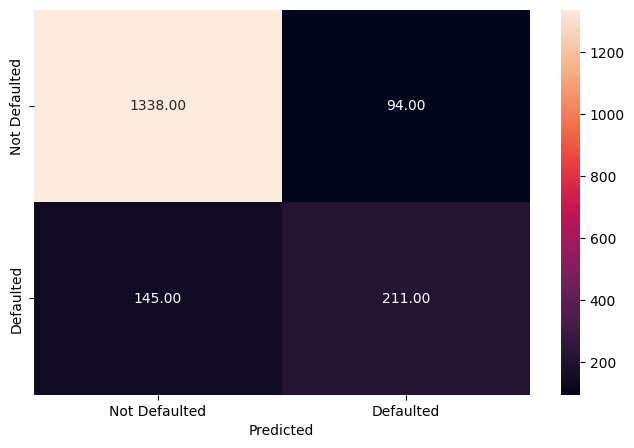

In [358]:
# Check performance on the test dataset
y_test_prediction_df_copy = dt_model_2.predict(x_test_)

metrics_score(y_test_, y_test_prediction_df_copy)

In [359]:
dt_test_2 = model_performance_classification(dt_model_2, x_test_, y_test_)

dt_test_2

,Precision,Recall,Accuracy
0,0.797014,0.763527,0.866331


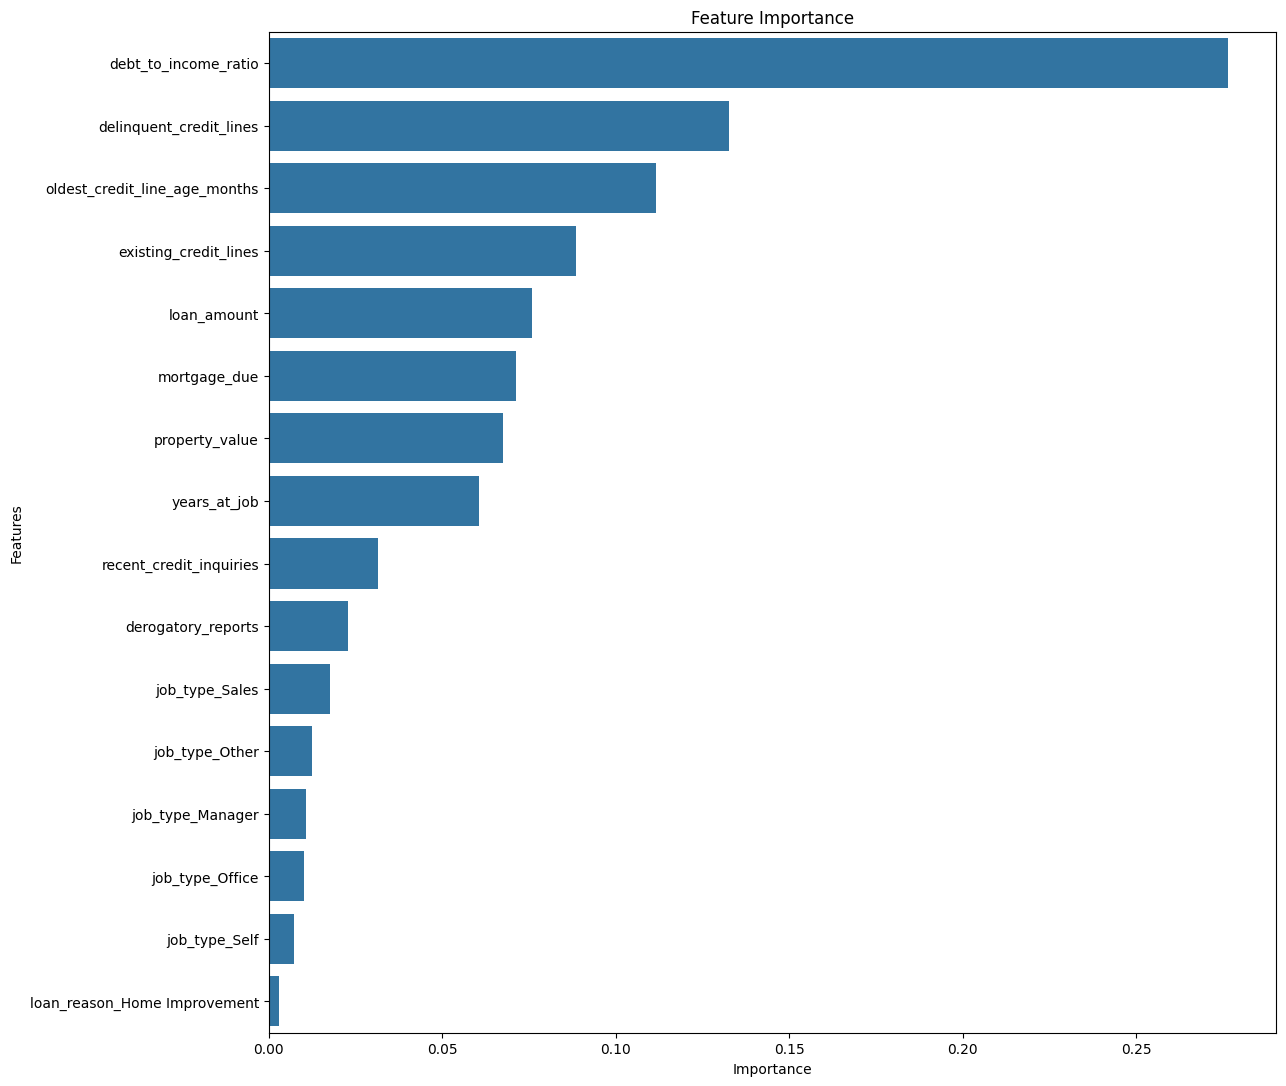

In [360]:
# Plot the feature importance using the first decision tree model, which has slightly better metrics
feature_importances = dt_model_2.feature_importances_

columns = X_.columns

importance_df = pd.DataFrame(feature_importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

plt.title('Feature Importance')

plt.xlabel('Importance')

plt.ylabel('Features')

plt.show()

**Insights**

- According to the decision tree **debt-to-income ratio**, **delinquent credit lines**, and **property value** are the most important features that determine if a customer will default or not followed by **oldest credit line age(months)** and **existing credit lines**.

- **Financial Stability:** Customers with higher property values and lower debt-to-income ratios are generally more financially stable and less likely to default.

- **Credit Management:** A longer credit history and a balanced number of credit lines suggest better credit management and lower default risk.

- **Risk Indicators:** High debt-to-income ratios and delinquent credit lines are key indicators of higher default risk.

#### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [361]:
# Grid of parameters to choose from
parameters = {
    'max_depth': [3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 3]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dt_model_2, parameters, scoring = scorer, cv = 15)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train_, y_train_)

# Set the classifier to the best combinations of parameters
dt_estimator_2 = gridCV.best_estimator_

# Fit the best estimator to the data
dt_estimator_2.fit(x_train_, y_train_)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=2,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      3339
           1       0.44      0.81      0.57       831

    accuracy                           0.76      4170
   macro avg       0.69      0.78      0.70      4170
weighted avg       0.84      0.76      0.78      4170



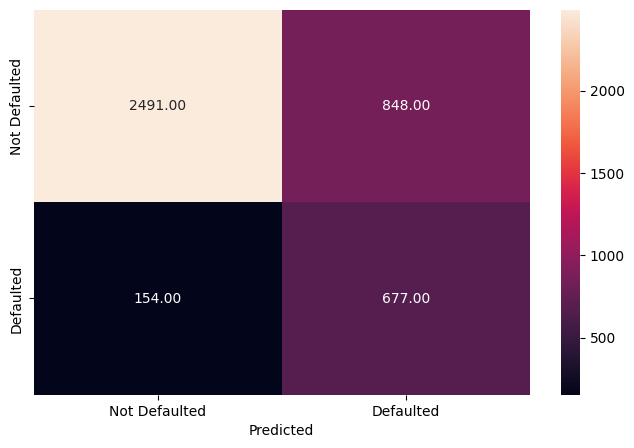

In [362]:
# Check performance on the training dataset
y_train_prediction_dt_classifier = dt_estimator_2.predict(x_train_)

metrics_score(y_train_, y_train_prediction_dt_classifier)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1432
           1       0.42      0.75      0.54       356

    accuracy                           0.74      1788
   macro avg       0.67      0.75      0.68      1788
weighted avg       0.82      0.74      0.77      1788



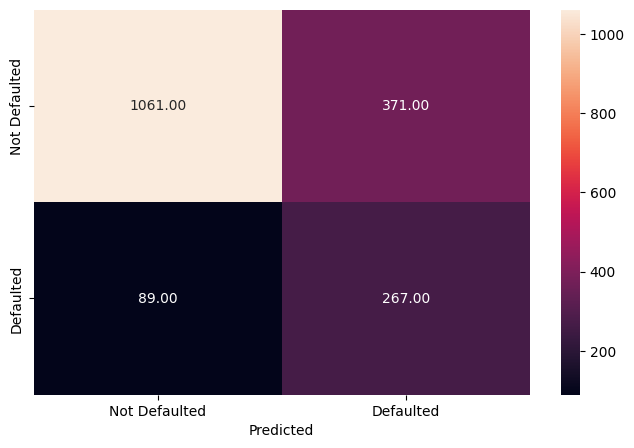

In [363]:
# Check performance on the test dataset
y_test_prediction_dt_classifier = dt_estimator_2.predict(x_test_)

metrics_score(y_test_, y_test_prediction_dt_classifier)

In [364]:
dt_test_3 = model_performance_classification(dt_estimator_2, x_test_, y_test_)

dt_test_3

,Precision,Recall,Accuracy
0,0.670552,0.745461,0.742729


**Training Set**:

Class 1 (Defaulted): Recall is 0.81, indicating the model identifies 81% of actual defaults correctly.

Class 0 (Non-defaulted): Recall is 0.75, which is good but not the focus here.

F1 Score (Class 1): 0.57 suggests a balance between precision and recall but is limited by lower precision.

**Testing Set**:

Class 1 (Defaulted): Recall is 0.75, meaning that the model is capturing 75% of defaults on unseen data, aligning well with the goal of minimizing false negatives.

Class 0 (Non-defaulted): Recall of 0.74, which is acceptable.
F1 Score (Class 1): 0.54 is moderate, suggesting room to improve precision without sacrificing recall.

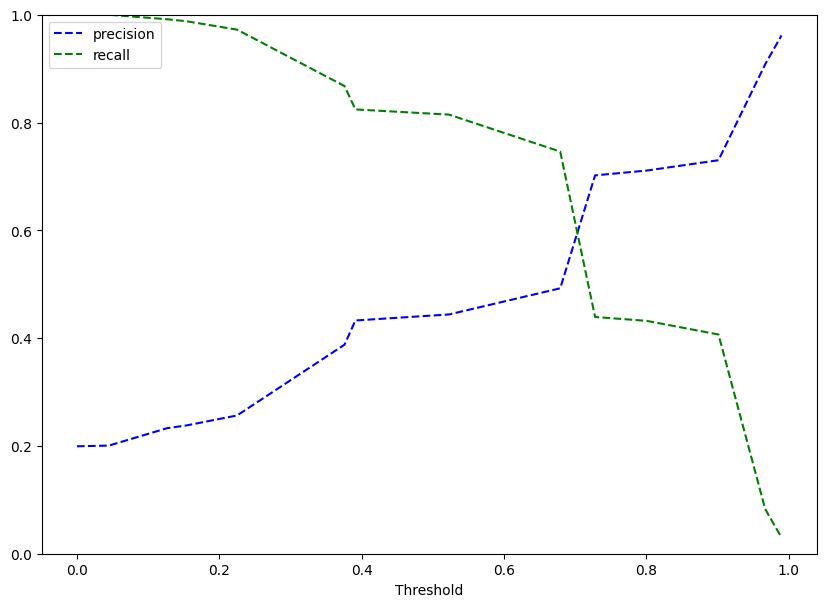

In [365]:
# predict_proba gives the probability of each observation belonging to each class
y_scores_rf = dt_estimator_2.predict_proba(x_train_)

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_rf, precisions_rf[:-1], 'b--', label = 'precision')

plt.plot(thresholds_rf, recalls_rf[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3339
           1       0.70      0.44      0.54       831

    accuracy                           0.85      4170
   macro avg       0.79      0.70      0.73      4170
weighted avg       0.84      0.85      0.84      4170



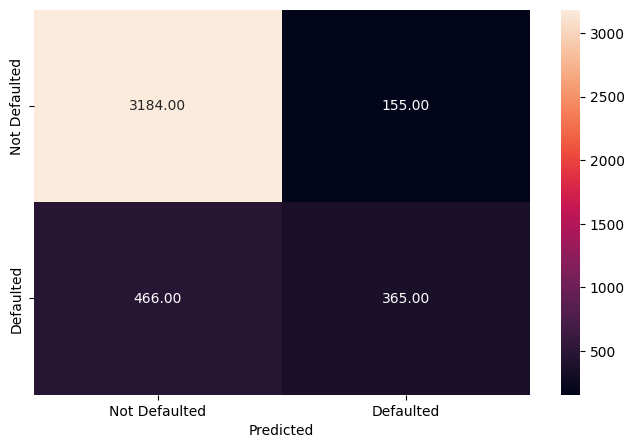

In [366]:
optimal_threshold1 = .7

y_prediction_train = dt_estimator_2.predict_proba(x_train_)

metrics_score(y_train, y_prediction_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1432
           1       0.67      0.39      0.49       356

    accuracy                           0.84      1788
   macro avg       0.77      0.67      0.70      1788
weighted avg       0.82      0.84      0.82      1788



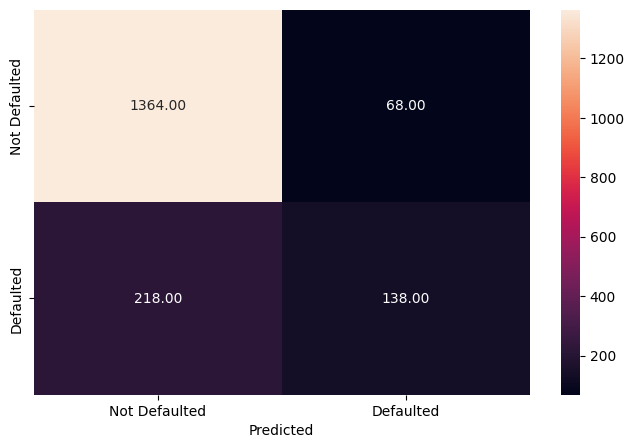

In [367]:
y_prediction_test = dt_estimator_2.predict_proba(x_test_)

metrics_score(y_test_, y_prediction_test[:, 1] > optimal_threshold1)

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

#### **Primary Forest**

In [368]:
rf_model = RandomForestClassifier(class_weight= 'balanced', random_state = 1)

rf_model.fit(x_train_, y_train_)

RandomForestClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3339
           1       1.00      1.00      1.00       831

    accuracy                           1.00      4170
   macro avg       1.00      1.00      1.00      4170
weighted avg       1.00      1.00      1.00      4170



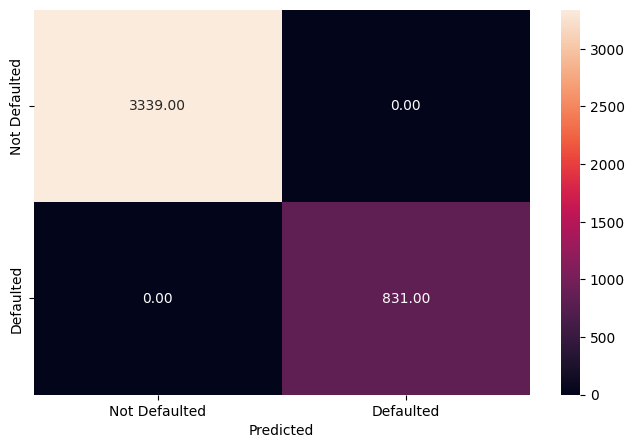

In [369]:
# Check performance on the training dataset
y_train_prediction_ = rf_model.predict(x_train_)

metrics_score(y_train_, y_train_prediction_)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1432
           1       0.87      0.63      0.73       356

    accuracy                           0.91      1788
   macro avg       0.89      0.80      0.84      1788
weighted avg       0.90      0.91      0.90      1788



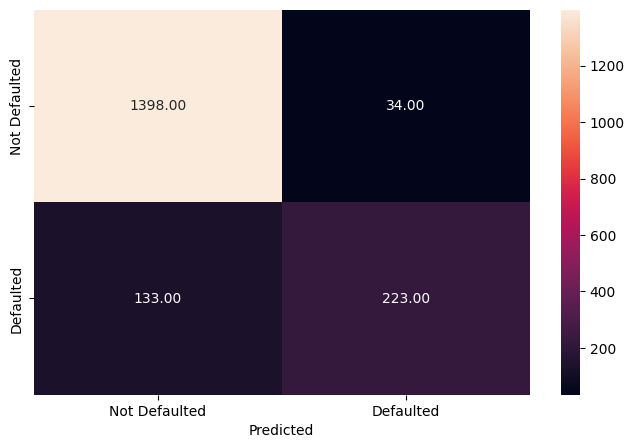

In [370]:
# Check performance on the test dataset
y_test_prediction_ = rf_model.predict(x_test_)

metrics_score(y_test_, y_test_prediction_)

In [371]:
rf_test = model_performance_classification(rf_model, x_test_, y_test_)

rf_test

,Precision,Recall,Accuracy
0,0.890416,0.801331,0.9066


- This first random forest model is **overfitting**.

#### **Random Forest Classifier Hyperparameter Tuning**

In [372]:
bool_columns = ['job_type_Manager', 'job_type_Sales', 'job_type_Self']

x_train_.drop(columns = bool_columns, inplace = True)

x_test_.drop(columns = bool_columns, inplace = True)

In [373]:
# Grid of parameters to choose from
parameters = {
    'criterion': ['entropy'],
    'n_estimators': [14, 15, 16],
    'max_depth': [18, 19, 20],
    'min_samples_leaf': [19, 20, 21]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(rf_model, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train_, y_train_)

# Set the classifier to the best combinations of parameters
rf_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
rf_estimator.fit(x_train_, y_train_)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, min_samples_leaf=20, n_estimators=15,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3339
           1       0.63      0.88      0.74       831

    accuracy                           0.87      4170
   macro avg       0.80      0.88      0.83      4170
weighted avg       0.90      0.87      0.88      4170



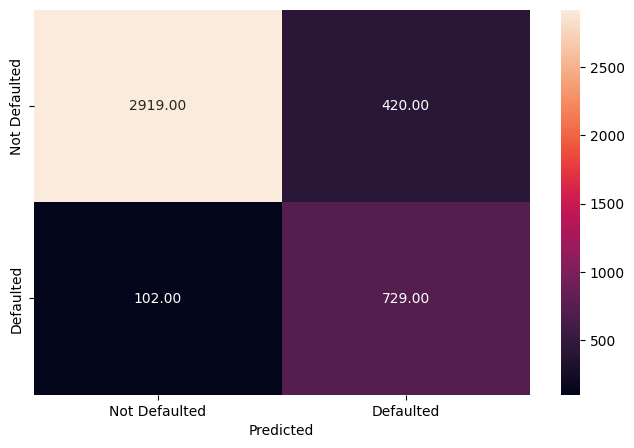

In [374]:
# Check performance on the training dataset
y_train_prediction_rf_classifier = rf_estimator.predict(x_train_)

metrics_score(y_train_, y_train_prediction_rf_classifier)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1432
           1       0.57      0.77      0.66       356

    accuracy                           0.84      1788
   macro avg       0.75      0.81      0.78      1788
weighted avg       0.87      0.84      0.85      1788



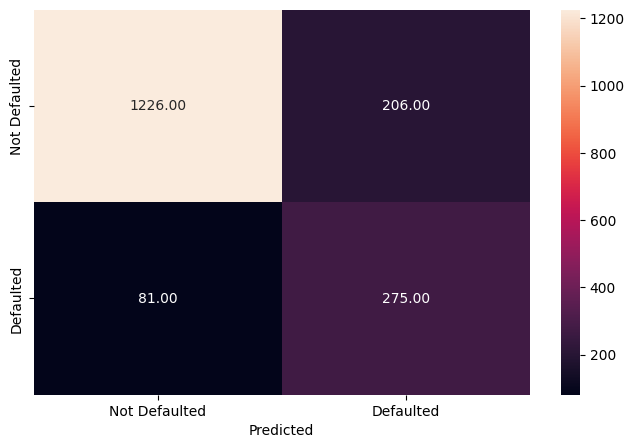

In [375]:
# Check performance on the test dataset
y_test_prediction_rf_classifier = rf_estimator.predict(x_test_)

metrics_score(y_test_, y_test_prediction_rf_classifier)

**Observations**

- **Training Set:** The model performs well with high precision and recall for both classes, indicating a good fit without overfitting.

- **Test Set:** The model maintains good performance, though there is a drop in recall for class 1 (0.77), which is still better than before.

In [376]:
rf_test_ = model_performance_classification(rf_estimator, x_test_, y_test_)

rf_test_

,Precision,Recall,Accuracy
0,0.754876,0.814309,0.839485


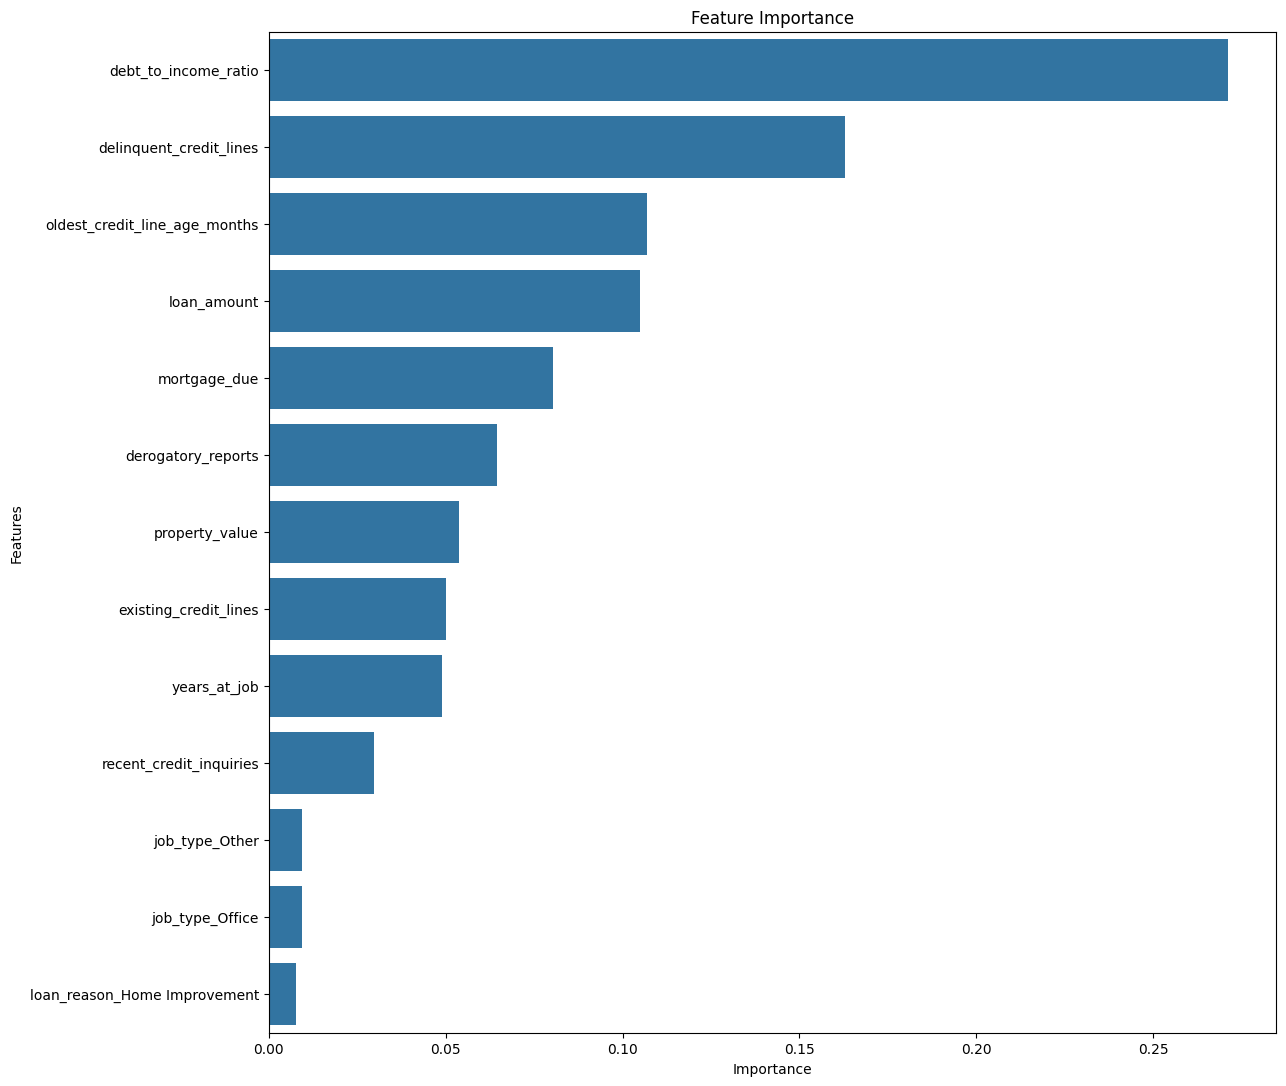

In [377]:
# Plot the feature importance using the first decision tree model, which has slightly better metrics
feature_importances = rf_estimator.feature_importances_

columns = x_train_.columns

importance_df = pd.DataFrame(feature_importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

plt.title('Feature Importance')

plt.xlabel('Importance')

plt.ylabel('Features')

plt.show()

**Observations**:

- The most important features that will determine if a customer defaults on their loan or not, according to the tuned random forest are:

- debt-to-income ratio

- delinquent credit lines amount

- oldest credit line age in months

##### **Checking Threshold**

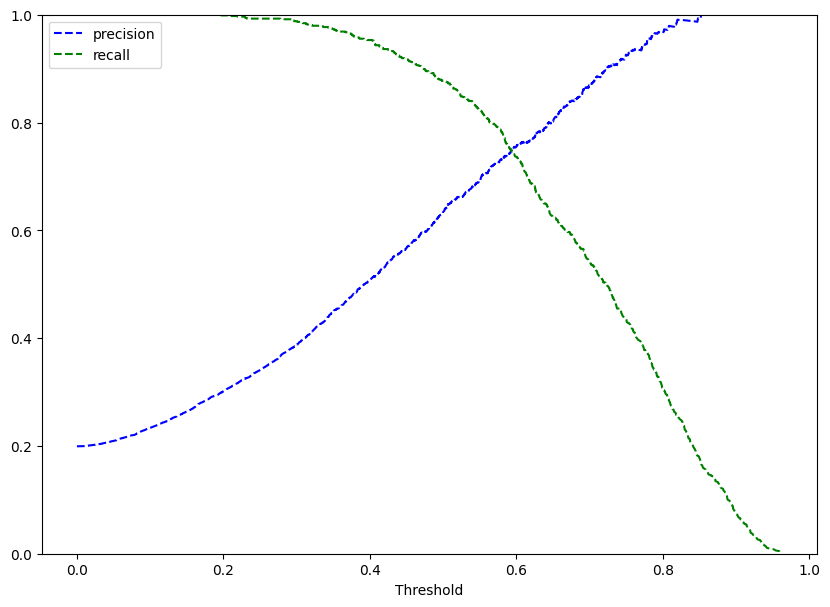

In [378]:
# predict_proba gives the probability of each observation belonging to each class
y_scores_rf = rf_estimator.predict_proba(x_train_)

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_rf, precisions_rf[:-1], 'b--', label = 'precision')

plt.plot(thresholds_rf, recalls_rf[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3339
           1       0.76      0.74      0.75       831

    accuracy                           0.90      4170
   macro avg       0.85      0.84      0.84      4170
weighted avg       0.90      0.90      0.90      4170



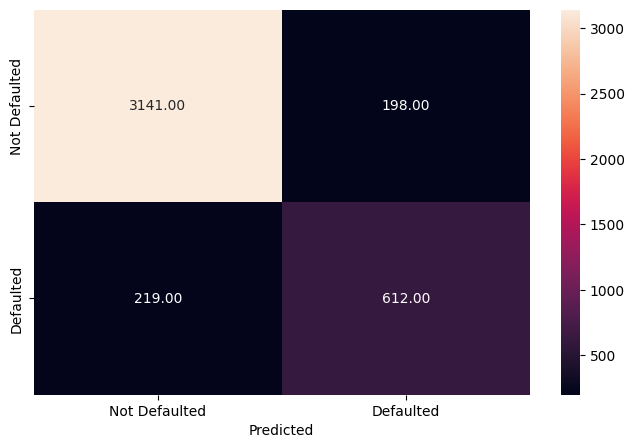

In [379]:
optimal_threshold1 = .6

y_prediction_train = rf_estimator.predict_proba(x_train_)

metrics_score(y_train, y_prediction_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1432
           1       0.68      0.62      0.65       356

    accuracy                           0.87      1788
   macro avg       0.79      0.77      0.78      1788
weighted avg       0.86      0.87      0.86      1788



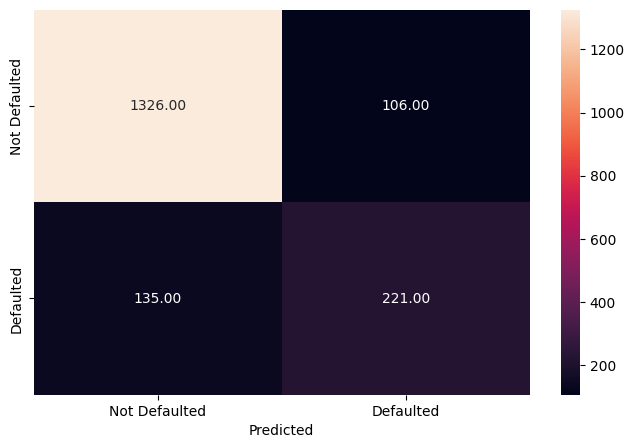

In [380]:
y_prediction_test = rf_estimator.predict_proba(x_test_)

metrics_score(y_test_, y_prediction_test[:, 1] > optimal_threshold1)

- The **recall** decreased significantly compared to the previous model.

### **Gradient Boost**

#### **Primary**

In [381]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [382]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [383]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train_, y_train_)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,x_test_,y_test_)


adaboost_model_perf_test

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Precision,Recall,Accuracy
0,0.842012,0.743072,0.877517


In [384]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train_, y_train_)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test_, y_test_)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.8729,0.759196,0.889821


In [385]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train_,y_train_)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb, x_test_, y_test_)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.888561,0.832951,0.914989


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3339
           1       1.00      1.00      1.00       831

    accuracy                           1.00      4170
   macro avg       1.00      1.00      1.00      4170
weighted avg       1.00      1.00      1.00      4170



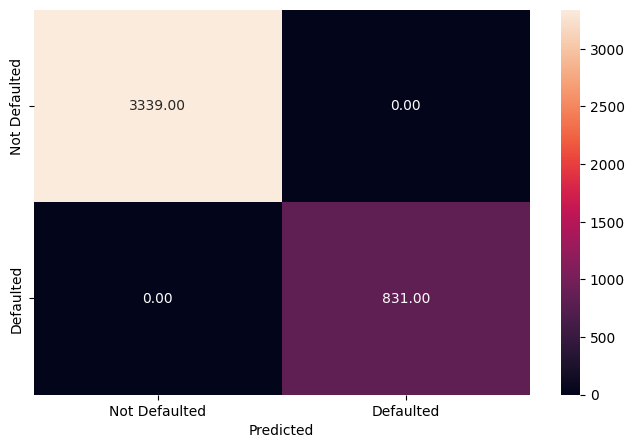

In [386]:
y_train_prediction_xgb = xgb.predict(x_train_)

metrics_score(y_train_, y_train_prediction_xgb)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1432
           1       0.85      0.70      0.77       356

    accuracy                           0.91      1788
   macro avg       0.89      0.83      0.86      1788
weighted avg       0.91      0.91      0.91      1788



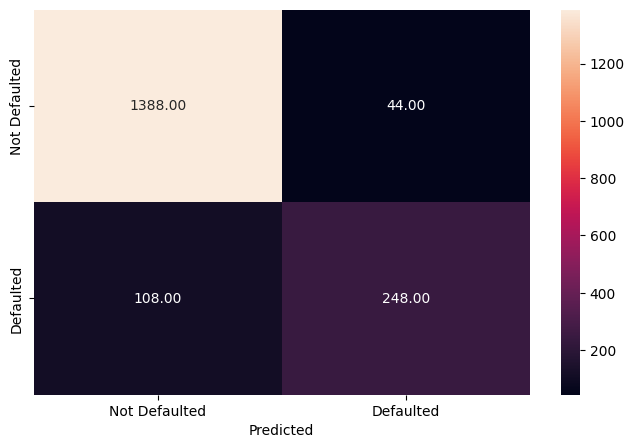

In [387]:
y_test_prediction_xgb = xgb.predict(x_test_)

metrics_score(y_test_, y_test_prediction_xgb)

- The model is **overfitting** and experienced a **significant drop in recall**.

#### **Hyperparameter Tuning**

In [388]:
# Grid of parameters to choose from
parameters = {
    'booster': ['gbtree', 'dart'],
    'min_child_weight': [14, 15, 16], #15
    'n_estimators': [15, 16, 17], #16
    'max_depth': [13, 14], #14
    'max_leaves': [16, 17] #16
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(xgb, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train_, y_train_)

# Set the classifier to the best combinations of parameters
xgb_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
xgb_estimator.fit(x_train_, y_train_)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=13,
              max_leaves=16, min_child_weight=15, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=17,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3339
           1       0.88      0.66      0.75       831

    accuracy                           0.91      4170
   macro avg       0.90      0.82      0.85      4170
weighted avg       0.91      0.91      0.91      4170



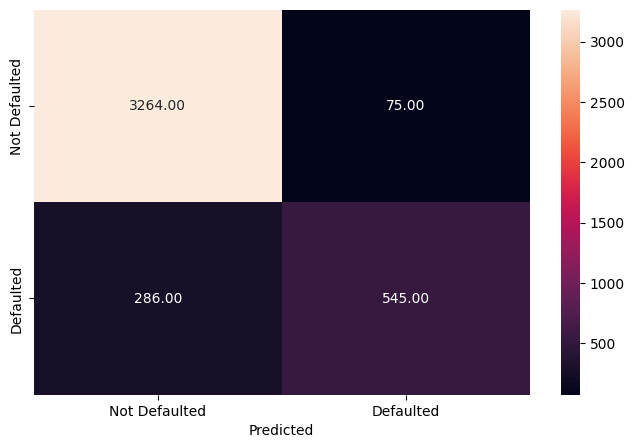

In [389]:
# Check performance on the training dataset
y_train_prediction_xgb_classifier = xgb_estimator.predict(x_train_)

metrics_score(y_train_, y_train_prediction_xgb_classifier)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1432
           1       0.84      0.56      0.68       356

    accuracy                           0.89      1788
   macro avg       0.87      0.77      0.81      1788
weighted avg       0.89      0.89      0.88      1788



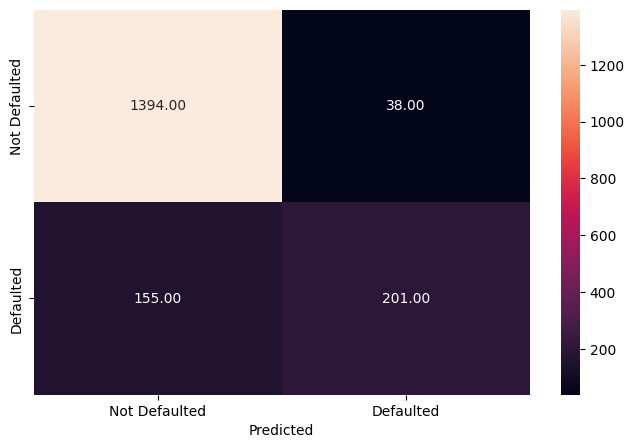

In [390]:
# Check performance on the test dataset
y_test_prediction_xgb_classifier = xgb_estimator.predict(x_test_)

metrics_score(y_test_, y_test_prediction_xgb_classifier)

In [391]:
xgb_test = model_performance_classification(xgb_estimator, x_test_, y_test_)

xgb_test

,Precision,Recall,Accuracy
0,0.87047,0.769035,0.892058


- Recall **decreased** significantly.

## **Feature Engineering**

In [392]:
# Creating a loan to value ratio
df['loan_to_value_ratio'] = df['loan_amount'] / df['property_value']

# Drop the original features used to create the new feature
df.drop(columns = ['loan_amount', 'property_value'], inplace = True)

In [393]:
# Dividing the debt-to-income ratio into low, medium, high, and extra high
df['low_debt_to_income_ratio'] = df['debt_to_income_ratio'].apply(lambda x: 1 if x <= 30.725 else 0)

df['medium_debt_to_income_ratio'] = df['debt_to_income_ratio'].apply(lambda x: 1 if x > 30.725 and x <= 34 else 0)

df['high_debt_to_income_ratio'] = df['debt_to_income_ratio'].apply(lambda x: 1 if x > 34 and x <= 38 else 0)

df['extra_high_debt_to_income_ration'] = df['debt_to_income_ratio'].apply(lambda x: 1 if x > 38 else 0)

In [394]:
# Drop the ratio used to create the new features
df.drop(columns = ['debt_to_income_ratio'], inplace = True)

In [396]:
# Separate the target(dependent) variable from the independent variables
Y = df['defaulted']

X = df.drop(['defaulted'], axis = 1)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3339
           1       1.00      1.00      1.00       831

    accuracy                           1.00      4170
   macro avg       1.00      1.00      1.00      4170
weighted avg       1.00      1.00      1.00      4170



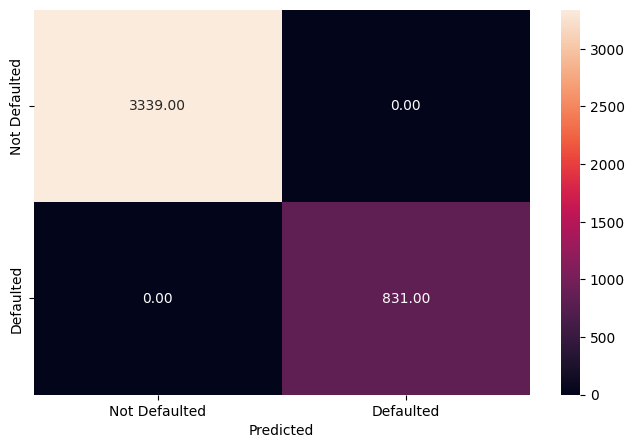

In [397]:
rf_model_2 = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

rf_model_2.fit(x_train, y_train)

# Check performance on the training dataset
y_train_prediction_rf = rf_model_2.predict(x_train)

metrics_score(y_train, y_train_prediction_rf)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1432
           1       0.87      0.62      0.72       356

    accuracy                           0.90      1788
   macro avg       0.89      0.80      0.83      1788
weighted avg       0.90      0.90      0.90      1788



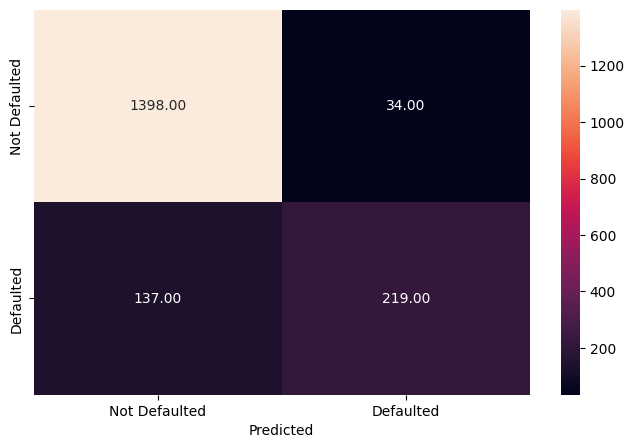

In [398]:
# Check performance on the test dataset
y_test_prediction_rf  = rf_model_2.predict(x_test)

metrics_score(y_test, y_test_prediction_rf)

- **Recall decreased**.

## **Final Observations**

**FINAL MODEL**

Hyper-tuned Random Forest is performing the best with the highest recall for defaults at **0.79**. This is the best model to choose because it minimizes the false negatives, or cases where the model predicts that the customer won't default but they actually default.

**FINAL INSIGHTS**:

**Loan and Mortgage Features**:

Loan amounts range from \$1,100 to \$89,900, with a strong right skew. Outliers in mortgage due start at \$150,000, reflecting a minority of high-value loans.
Property values are also right-skewed, with outliers beyond \$200,000. These high property values correlate positively with higher mortgage due amounts.

**Employment and Job Type Insights**:

Self-employed customers have the highest average loan amounts and property values, suggesting higher financial leverage.
Sales jobs show the highest default rates, likely due to income volatility, while executive and office jobs have the lowest default rates.
Managers and self-employed individuals have the highest delinquent credit lines, suggesting riskier credit behavior.
‘Other’ and managerial jobs show the longest time at current job, while sales and self-employed roles show the least.

**Credit Behavior**:

Most customers have no derogatory reports or delinquent credit lines, with these distributions skewed to the right.
Delinquent credit lines show a moderate positive correlation with loan defaults, marking them as a key predictor.
Existing credit lines display multi-modal behavior, with significant outliers beyond 50 credit lines, capped for modeling purposes.

**Debt-to-Income and Financial Ratios**:

The debt-to-income ratio (DTI) is a critical predictor, with outliers at both ends and a mode around 40%. Higher DTI values signal higher default risk.
The loan-to-value ratio is strongly influenced by both property value and loan amount and reflects customer leverage levels.

**Loan Purpose and Default Rates**:

Debt consolidation is the most common loan purpose, accounting for more than twice the number of home improvement loans.
Home improvement loans, though fewer, show slightly higher default rates, suggesting riskier financial behavior for this group.

**Feature Correlations**:

Mortgage due correlates significantly with property value, reflecting larger loans on higher-value properties.

**Moderate correlations are observed**:

Between delinquent credit lines and default.
Between loan amount and property value.
Between existing credit lines and mortgage due.

**Behavior by Credit Line Age and Inquiries**:

Oldest credit lines are bimodal around 125 and 175 months, reflecting distinct borrower cohorts. Outliers exist around 400 months.
Recent credit inquiries are skewed, with most customers having few to none, but a long tail toward higher inquiries, especially among managers and self-employed.

**Most Important Features for Prediction**:

**Debt-to-Income Ratio (DTI)**:

Indicates financial leverage and correlates strongly with default risk.

**Delinquent Credit Lines**:

Higher delinquency rates are moderately correlated with default.

**Oldest Credit Line Age**:

Longer credit history suggests financial stability but also reflects potential over-leverage in older accounts.